# Exploratory Data Analysis Project Group 8

### Library Importation

In [169]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler

### Data Import and Clean

This section's goal is to import different data sheet and clean them to make them meet our expectation of data and be ready for merging.

mbti data sheet

In [170]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# MBTI data import
df_mbti = pd.read_csv("./data/raw/mbti.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_mbti = df_mbti.drop(["stat","enneagram","img_url"],axis = 1)

# Drop duplicated rows
df_mbti = df_mbti.drop_duplicates()

# Check if there is any NaN value or abnormal values in mbti columns 
print(df_mbti["mbti"].unique())
print(df_mbti["mbti"].isna().any())

# Drop the rows are "XXXX" (which is not a mbti type)
df_mbti = df_mbti[df_mbti["mbti"]!= "XXXX"]

# Make sure first letters are capitalized in "role" and "movie" columns
df_mbti["role"] = df_mbti["role"].str.title()
df_mbti["movie"] = df_mbti["movie"].str.title()

# Use str.strip() to remove spaces.
df_mbti["movie"] = df_mbti["movie"].str.strip()

# Regular expression pattern for extracting year: '(.*) \((\d{4})\)'
pattern_year = r'(.*) \((\d{4})\)'

# Extract movies with year
# Save the year into "release_year" columns
df_mbti[['movie_clean', 'release_year']] = df_mbti['movie'].str.extract(pattern_year)

# Regular expression pattern to match content in parentheses
pattern_parentheses = r'\s*\([^)]*\)'

# Remove content in parentheses
# Save movie names without parentheses into "movie_clean" columns
df_mbti['movie_clean'] = df_mbti['movie'].str.replace(pattern_parentheses, '', regex=True)

# Convert "release_year" column to datetime
df_mbti['release_year'] = pd.to_datetime(df_mbti['release_year'], format = '%Y').dt.year

# Drop "movie_name" column
df_mbti.drop("movie",axis=1, inplace=True)

# Rename columns to have consistency in all data sheets
df_mbti.rename(columns={'role': 'character','movie_clean':'movie_name'}, inplace=True)

df_mbti.to_csv("./data/cleaned/df_mbti.csv")

df_mbti.info()

['ESFP' 'XXXX' 'ESFJ' 'ESTP' 'ESTJ' 'ENFP' 'ENFJ' 'ENTP' 'ENTJ' 'ISFP'
 'ISFJ' 'ISTP' 'ISTJ' 'INFP' 'INFJ' 'INTP' 'INTJ']
False
<class 'pandas.core.frame.DataFrame'>
Index: 16727 entries, 0 to 18740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          16727 non-null  object 
 1   character     16727 non-null  object 
 2   movie_name    16727 non-null  object 
 3   release_year  10939 non-null  float64
dtypes: float64(1), object(3)
memory usage: 653.4+ KB


In [171]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_mbti.sample(10)

,mbti,character,movie_name,release_year
1008,ESFP,The Man,Sunrise: A Song Of Two Humans,NaN
1168,ESFP,Tommy Frigo,Adventureland,2009.0
6146,ENFP,Kenny Potter,A Single Man,2009.0
10621,ISFP,Nicole Manning,Stuber,2019.0
8578,ENTP,Maggie,King Arthur: Legend Of The Sword,2017.0
1567,ESFJ,Dorothy Gale,The Wizard Of Oz,1939.0
7745,ENTP,Tim Murphy,Jurassic Park / Jurassic World,NaN
4007,ESTP,Val,Unfriended,2014.0
16937,INFJ,Lady Marian Fitzwalter / Maid Marian ( Olivia ...,The Adventures Of Robin Hood,1938.0
11809,ISFJ,Fetcher,Chicken Run,2000.0


imdb_movies

In [172]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# imdb_movies data import
df_imdb_map = pd.read_csv("./data/raw/imdb_movies.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_imdb_map = df_imdb_map.drop(["overview","crew","orig_title","status","orig_lang"],axis = 1)

# Drop duplicated rows
df_imdb_map = df_imdb_map.drop_duplicates()

# Check if there is any NaN value in "names" columns 
print(df_imdb_map["names"].isna().any())

# Make sure first letters are capitalized in "names" and "genre" columns
df_imdb_map["names"] = df_imdb_map["names"].str.title()
df_imdb_map["genre"] = df_imdb_map["genre"].str.title()

# Strip whitespace
df_imdb_map['date_x'] = df_imdb_map['date_x'].str.strip()

# Convert "date_x" column to datetime
df_imdb_map['date_x'] = pd.to_datetime(df_imdb_map['date_x'], format='%m/%d/%Y')

# Create "release_year" column
df_imdb_map['release_year'] = df_imdb_map['date_x'].dt.year.astype('float')

# Rename columns to have consistency in all data sheets
df_imdb_map.rename(columns={'names': 'movie_name', 'date_x': 'release_date','budget_x':'budget'}, inplace=True)

df_imdb_map.to_csv("./data/cleaned/df_imdb_map.csv")

df_imdb_map.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_name    10178 non-null  object        
 1   release_date  10178 non-null  datetime64[ns]
 2   score         10178 non-null  float64       
 3   genre         10093 non-null  object        
 4   budget        10178 non-null  float64       
 5   revenue       10178 non-null  float64       
 6   country       10178 non-null  object        
 7   release_year  10178 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 636.2+ KB


In [173]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_imdb_map.sample(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year
8048,Jackass 2.5,2007-12-18,61.0,"Comedy, Documentary",148560000.0,662038398.0,US,2007.0
7589,Dangal,2016-12-23,80.0,"Drama, Family, Comedy, Action",9500000.0,305149461.0,IN,2016.0
5043,Fighting With My Family,2019-02-18,69.0,Comedy,11000000.0,39055536.0,AU,2019.0
1308,Atrapadas En Familia,2022-02-25,73.0,Comedy,119000000.0,646477476.0,MX,2022.0
2104,Martians Vs Mexicans,2018-03-09,79.0,"Animation, Comedy",94000000.0,704890509.2,MX,2018.0
5237,Halloween Ii,2009-08-28,54.0,Horror,2500000.0,25533818.0,US,2009.0
4009,Four Brothers,2005-09-06,68.0,"Action, Crime",30000000.0,92494381.0,AU,2005.0
3868,The Devil All The Time,2020-09-16,72.0,"Crime, Drama, Thriller",138900000.0,187962823.0,AU,2020.0
5094,Giving Hope: The Ni'Cola Mitchell Story,2023-04-09,0.0,"Drama, Crime, Tv Movie",199600000.0,175269998.8,US,2023.0
2552,Epic,2013-06-13,65.0,"Animation, Adventure, Family, Fantasy",100000000.0,262794441.0,AU,2013.0


imdb_db

In [174]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

#imdb_db data import
df_db = pd.read_csv("./data/raw/imdb_db.csv")

# Drop unrelated comlumns "Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"
df_db = df_db.drop(["Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"],axis = 1)

# Drop duplicated rows
df_db = df_db.drop_duplicates()

# Check if there is any NaN value in "Movie Name" columns 
print(df_db["Movie Name"].isna().any())

# Make sure first letters are capitalized in "Movie Name" and "Movie Type" columns
df_db["Movie Name"] = df_db["Movie Name"].str.title()
df_db["Movie Type"] = df_db["Movie Type"].str.title()

# Remove square brackets in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r'[\[\]]', '', regex=True)

# Remove single quotes in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r"'", '', regex=True)

# Rename columns to have consistency in all data sheets
df_db.rename(columns={'Movie Name': 'movie_name',
                            'Movie Date': 'release_year',
                            'Movie Type':'genre',
                            'Movie Revenue (M$)':'revenue',
                            'Score':'score',
                            'Metascore':'metascore'}, inplace=True)

df_db.to_csv("./data/cleaned/df_db.csv")
df_db.info()

False
<class 'pandas.core.frame.DataFrame'>
Index: 130482 entries, 0 to 189895
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie_name    130482 non-null  object 
 1   release_year  130477 non-null  float64
 2   genre         130482 non-null  object 
 3   revenue       9082 non-null    float64
 4   score         130482 non-null  float64
 5   metascore     8672 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.0+ MB


In [175]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_db.sample(10)

,movie_name,release_year,genre,revenue,score,metascore
76657,Yungnyong-I Nareusya,2015.0,"Drama, History",NaN,8.9,NaN
103331,Dragon Ball Z,1996.0,"Animation, Action, Adventure",NaN,7.2,NaN
150473,"No Dessert, Dad, Till You Mow The Lawn",1994.0,Comedy,NaN,4.8,NaN
123063,My Brother The Time Traveler,2017.0,Comedy,NaN,6.0,NaN
122605,Werner Herzog: Filmemacher,1986.0,"Documentary, Short",NaN,6.7,NaN
106155,Green Day: Awesome As F**K,2011.0,Music,NaN,8.5,NaN
121048,The Weight Of Gold,2020.0,Documentary,NaN,7.1,NaN
147681,Living In Your Car,2010.0,Comedy,NaN,7.4,NaN
62024,Uyanik Kardesler,1974.0,"Comedy, Drama",NaN,6.4,NaN
92109,The Wise Quacking Duck,1943.0,"Animation, Short, Action",NaN,7.3,NaN


In [176]:
#combined_dataset = pd.merge(df_imdb_map, df_db, on=['movie_name','release_year'], how='outer')
#combined_dataset.info()

### Merge df_db and df_mbti

In [177]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# Split df_mbti into two datasets: one where release_year is not null and one where it is null
df_mbti_with_year = df_mbti[df_mbti['release_year'].notnull()]
df_mbti_no_year = df_mbti[df_mbti['release_year'].isnull()]

# Drop release_year for merge
df_mbti_no_year.drop('release_year', inplace=True, axis=1)

# Merge the datasets based only on 'movie_name' for those without a release year
merged_no_year = pd.merge(df_mbti_no_year, df_db, on='movie_name', how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_no_year.drop_duplicates(subset=['movie_name','character'],keep = 'first',inplace=True)

# Merge the datasets based on 'movie_name_clean' and 'release_year' for those with a release year
merged_with_year = pd.merge(df_mbti_with_year, df_db, on=['movie_name', 'release_year'], how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_with_year.drop_duplicates(subset=['movie_name','character','release_year'],keep = 'first',inplace=True)

# Combine the two merged datasets
final_merged_df = pd.concat([merged_with_year, merged_no_year])

# Display the first few rows of the final merged dataset
final_merged_df.sort_values(['movie_name','mbti']).to_csv("./data/cleaned/df_merged.csv")

/var/folders/br/n0gxlymn0t53y30rm6v_3swc0000gn/T/ipykernel_10551/1569939163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbti_no_year.drop('release_year', inplace=True, axis=1)


In [178]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2811 entries, 0 to 2646
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          2811 non-null   object 
 1   character     2811 non-null   object 
 2   movie_name    2811 non-null   object 
 3   release_year  2811 non-null   float64
 4   genre         2811 non-null   object 
 5   revenue       384 non-null    float64
 6   score         2811 non-null   float64
 7   metascore     483 non-null    float64
dtypes: float64(4), object(4)
memory usage: 197.6+ KB


In [179]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

final_merged_df.sample(10)

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
985,INTJ,Harold,The Boys In The Band,2020.0,Drama,NaN,6.8,70.0
941,ENFJ,Miss Mann,Scary Movie,1991.0,"Comedy, Horror, Thriller",NaN,4.8,NaN
255,ENFP,Angelita,K-12,2019.0,"Fantasy, Horror, Musical",303230.0,6.4,NaN
81,ENFP,Dennis,Hotel Transylvania,2012.0,"Animation, Comedy, Game-Show",NaN,7.1,NaN
40,ISTP,Papá Julio,Coco,2017.0,"Drama, Musical",NaN,5.3,54.0
1362,ENTP,Zoltan Karpathy,My Fair Lady,2009.0,"Comedy, Romance",NaN,6.9,NaN
420,ISFJ,Crane,Kung Fu Panda,2008.0,"Action, Comedy, Family",NaN,7.2,NaN
415,ESFJ,Sibel,Ramo,2020.0,Drama,NaN,6.1,NaN
2198,ESTP,Scotty Brennen,Big,2012.0,"Comedy, Drama, Fantasy",NaN,7.0,NaN
1681,ISFP,Margalo,Stuart Little,2003.0,"Animation, Adventure, Comedy",NaN,4.7,NaN


In [180]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

final_merged_df.head()

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
0,ESFP,Jack Dawson,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
1,ESTP,Brock Lovett,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
2,ESTP,Fifth Officer Harold Lowe,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
3,ESTJ,"Caledon ""Cal"" Hockley",Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
4,ESTJ,Bruce Ismay,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0


In [181]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

# Converting the final dataset into csv file
final_merged_df.to_csv("final_merged_dataset.csv", index = False)


# Data Analysis - Genre and MBTI - Xiaotong 'Brandon' Ma

In [182]:
df_mbti_genre = final_merged_df.copy()

# Since a movie can belong to multiple genres, we need to split the genre field and then explode it
df_mbti_genre['genre'] = df_mbti_genre['genre'].str.split(', ')

# Exploding the dataframe on the 'genre' column
df_mbti_genre = df_mbti_genre.explode('genre')

# Counting the number of each MBTI type across all movies, grouped by genre
mbti_count_by_genre = df_mbti_genre.groupby(['genre', 'mbti']).size().reset_index(name='count')

# Group by 'genre' and filter based on the sum of 'count'
mbti_count_by_genre = mbti_count_by_genre.groupby('genre').filter(lambda x: x['count'].sum() >= 100)

# Calculate the distribution based on normalization on genre
mbti_count_by_genre["total_count_each_genre"] = mbti_count_by_genre.groupby("genre")["count"].transform('sum')
mbti_count_by_genre["mbti_by_genre_proportion"] = mbti_count_by_genre["count"] / mbti_count_by_genre["total_count_each_genre"] * 100

# Calculate the distribution based on normalization both on genre and mbti
mbti_count_by_genre["total_count_each_mbti"] = mbti_count_by_genre.groupby("mbti")["mbti_by_genre_proportion"].transform('sum')
mbti_count_by_genre["genre_by_mbti_proportion"] = mbti_count_by_genre["mbti_by_genre_proportion"] / mbti_count_by_genre["total_count_each_mbti"] * 100

In [183]:
# Take a look
mbti_count_by_genre.sample(10)

,genre,mbti,count,total_count_each_genre,mbti_by_genre_proportion,total_count_each_mbti,genre_by_mbti_proportion
23,Adventure,ESTP,83,1048,7.919847,121.417430,6.522826
297,Short,ISTP,15,225,6.666667,102.121253,6.528187
184,Horror,ENTJ,18,285,6.315789,75.497468,8.365565
122,Drama,INTP,25,883,2.831257,52.688852,5.373541
137,Family,INTJ,10,382,2.617801,69.982906,3.740629
6,Action,ESTJ,93,1124,8.274021,105.041659,7.876895
12,Action,ISFJ,83,1124,7.384342,107.487900,6.869928
37,Animation,ESFP,35,477,7.337526,106.784391,6.871347
92,Crime,ISFJ,14,227,6.167401,107.487900,5.737763
261,Romance,INTP,7,241,2.904564,52.688852,5.512673


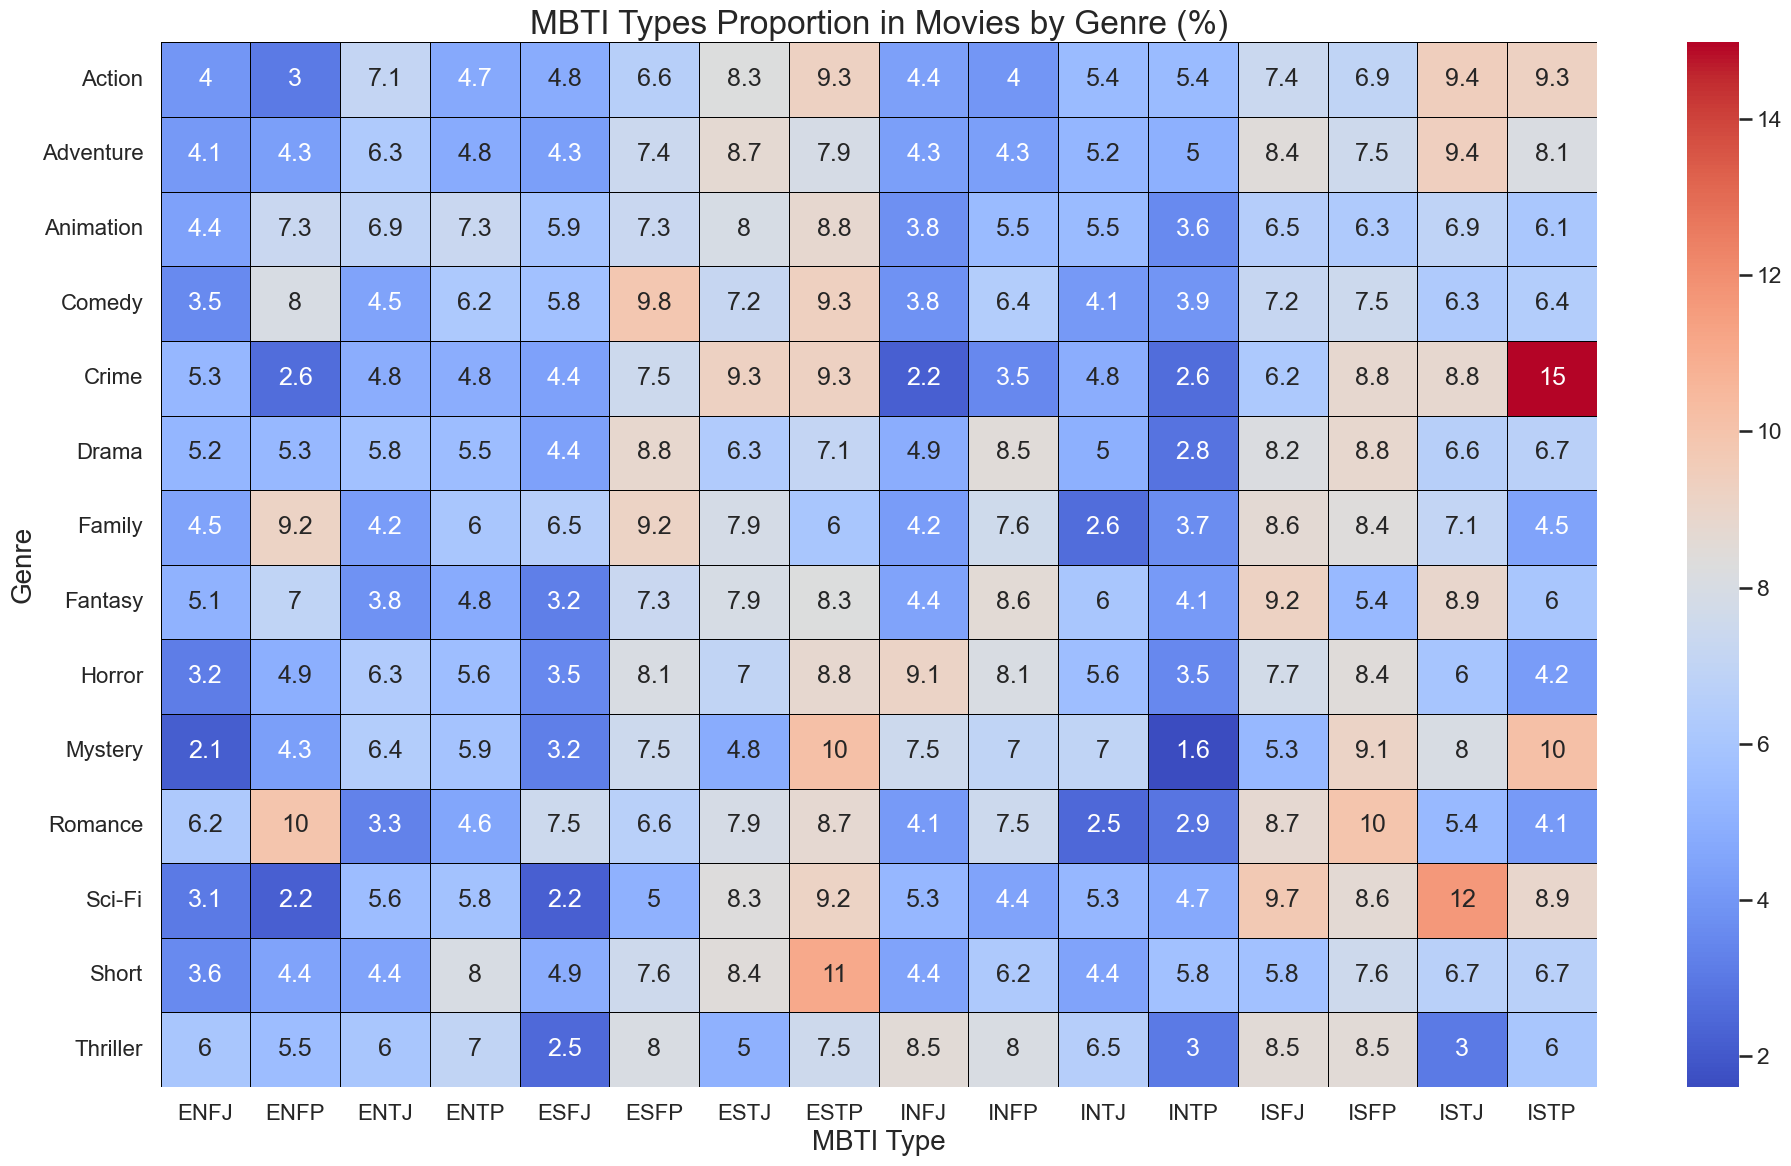

In [184]:
# Creating a pivot table for better plotting
pivot_table = mbti_count_by_genre.pivot_table(index='genre', columns='mbti', values='mbti_by_genre_proportion', fill_value=0)

# Convert counts to integers for better formatting in the heatmap
pivot_table = pivot_table.astype(float)

# Your existing code for creating the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title('MBTI Types Proportion in Movies by Genre (%)', fontsize=24)
plt.ylabel('Genre', fontsize=20)
plt.xlabel('MBTI Type', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/Genre/mbti_genre.png", dpi=300)  # Increase the dpi for better quality

# Show the plot
plt.show()

In [185]:
# Label four demensions
mbti_count_by_genre["I-E"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "INTJ", "ISTP", "INTP", "ISFJ", "INFJ", "ISFP", "INFP"])
mbti_count_by_genre["I-E"] = mbti_count_by_genre["I-E"].replace({True: 'Introverts', False: 'Extroverts'})

mbti_count_by_genre["S-N"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "ISFJ", "ISFP", "ESTJ", "ESTP", "ESFJ", "ESFP"])
mbti_count_by_genre["S-N"] = mbti_count_by_genre["S-N"].replace({True: 'Sensing', False: 'Intuition'})

mbti_count_by_genre["T-F"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "INTJ", "INTP", "ESTJ", "ESTP", "ENTJ", "ENTP"])
mbti_count_by_genre["T-F"] = mbti_count_by_genre["T-F"].replace({True: 'Thinking', False: 'Feeling'})

mbti_count_by_genre["J-P"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISFJ", "INTJ", "INFJ", "ESTJ", "ESFJ", "ENTJ", "ENFJ"])
mbti_count_by_genre["J-P"] = mbti_count_by_genre["J-P"].replace({True: 'Judging', False: 'Perceving'})

In [186]:
# Function to plot MBTI demensions and genre
def plot_mbti_proportions_genre(data, category, file_name, colors=("lightblue", "lightcoral")):
    """
    Function to plot MBTI proportions by genre, grouped by a specified MBTI category, with customizable colors.

    Parameters:
    data (DataFrame): The dataset containing MBTI information.
    category (str): The MBTI category to group by. Options: 'I-E', 'S-N', 'T-F', 'J-P'.
    filename (str): The filename assigned for local file
    colors (tuple): A tuple of two color values for the plot.
    """
    # Grouping the data by 'genre' and the specified category, summing 'mbti_by_genre_proportion'
    grouped_data = data.groupby(['genre', category])['mbti_by_genre_proportion'].sum().reset_index()

    # Plotting with the specified colors
    plt.figure(figsize=(20, 10))
    sns.barplot(x='genre', y='mbti_by_genre_proportion', hue=category, data=grouped_data, palette=colors)
    plt.title(f'Sum of MBTI Proportion in Each Genre Grouped by {category}', fontsize=24)
    plt.xticks(fontsize = 16)
    plt.yticks(rotation=0, fontsize=16) 
    plt.ylabel('MBTI Proportion (%)', fontsize=20)
    plt.xlabel('Genre', fontsize=20)
    plt.legend(title=category, fontsize = 14)
    plt.tight_layout()

    # Saving the plot to a file
    file_path = f"./images/Genre/{file_name}.png"
    plt.savefig(file_path)

    # Displaying the plot
    plt.show()

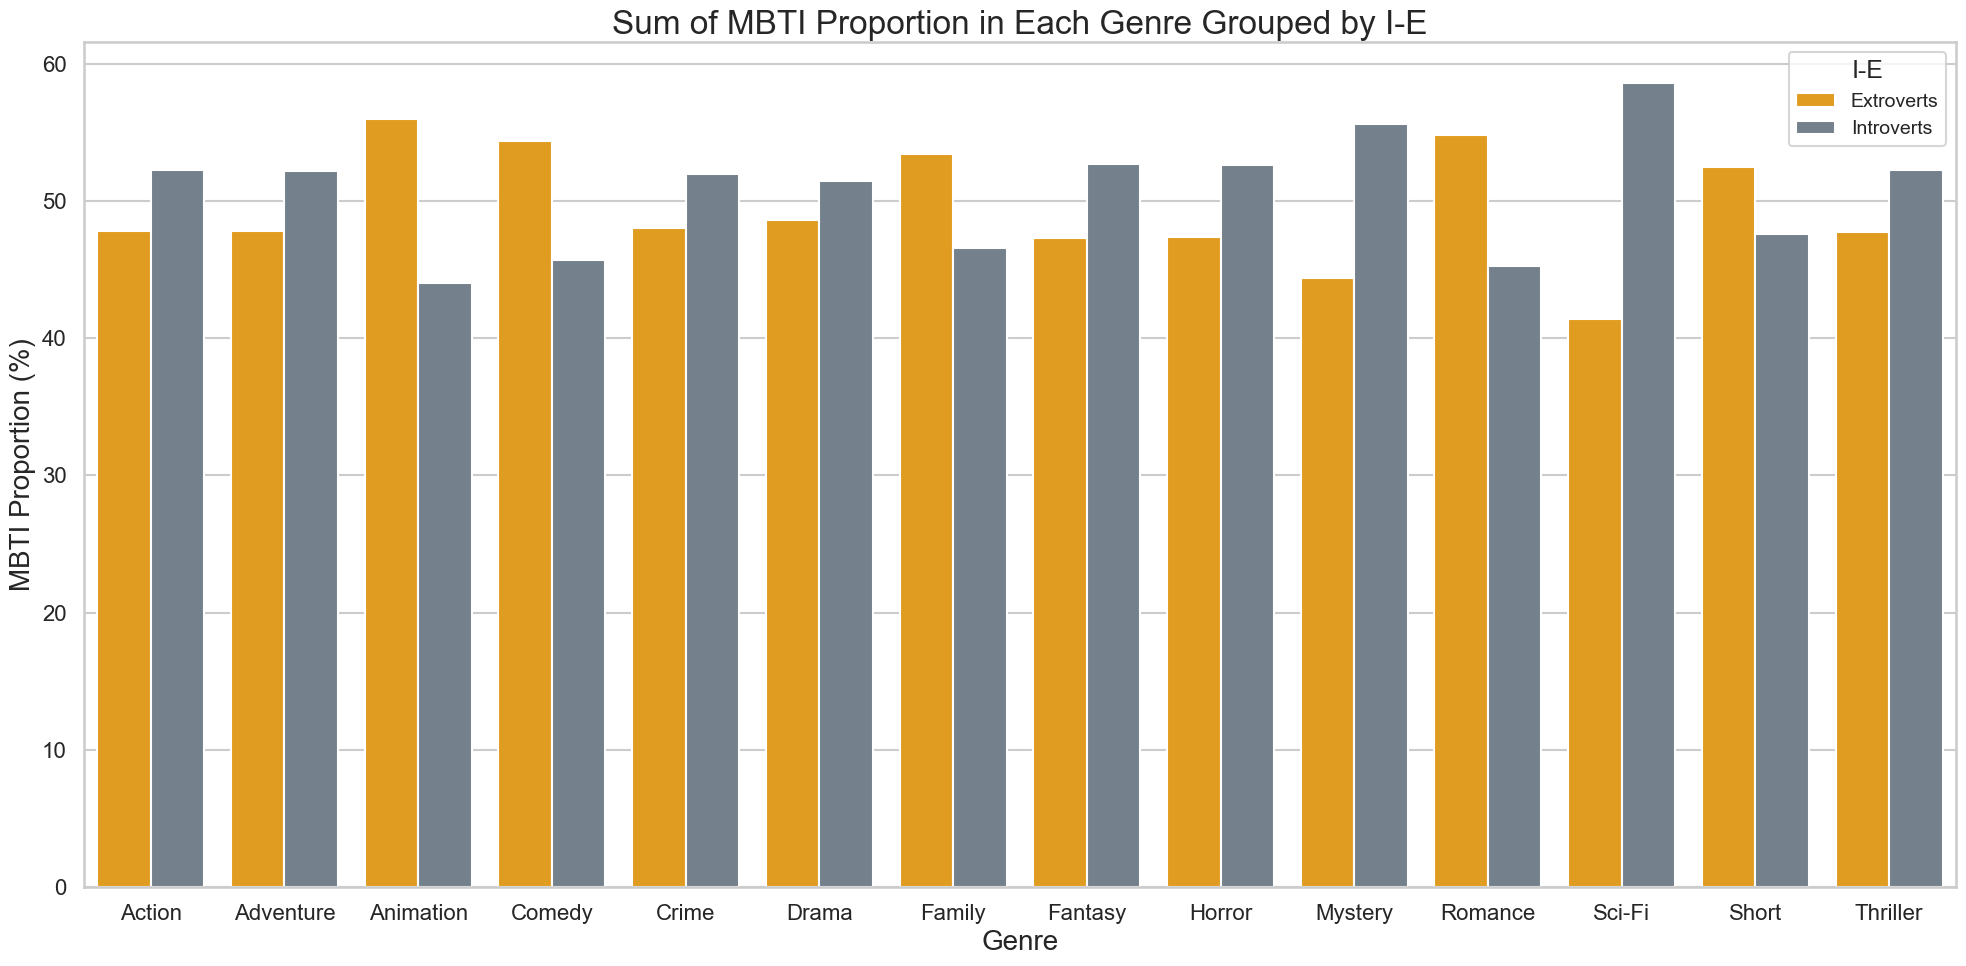

In [187]:
# I-E
plot_mbti_proportions_genre(mbti_count_by_genre, 'I-E',"Sum of MBTI Proportion in Each Genre Grouped by I-E", colors=("#FFA500", "#708090"))  # Custom colors for Introverts and Extroverts

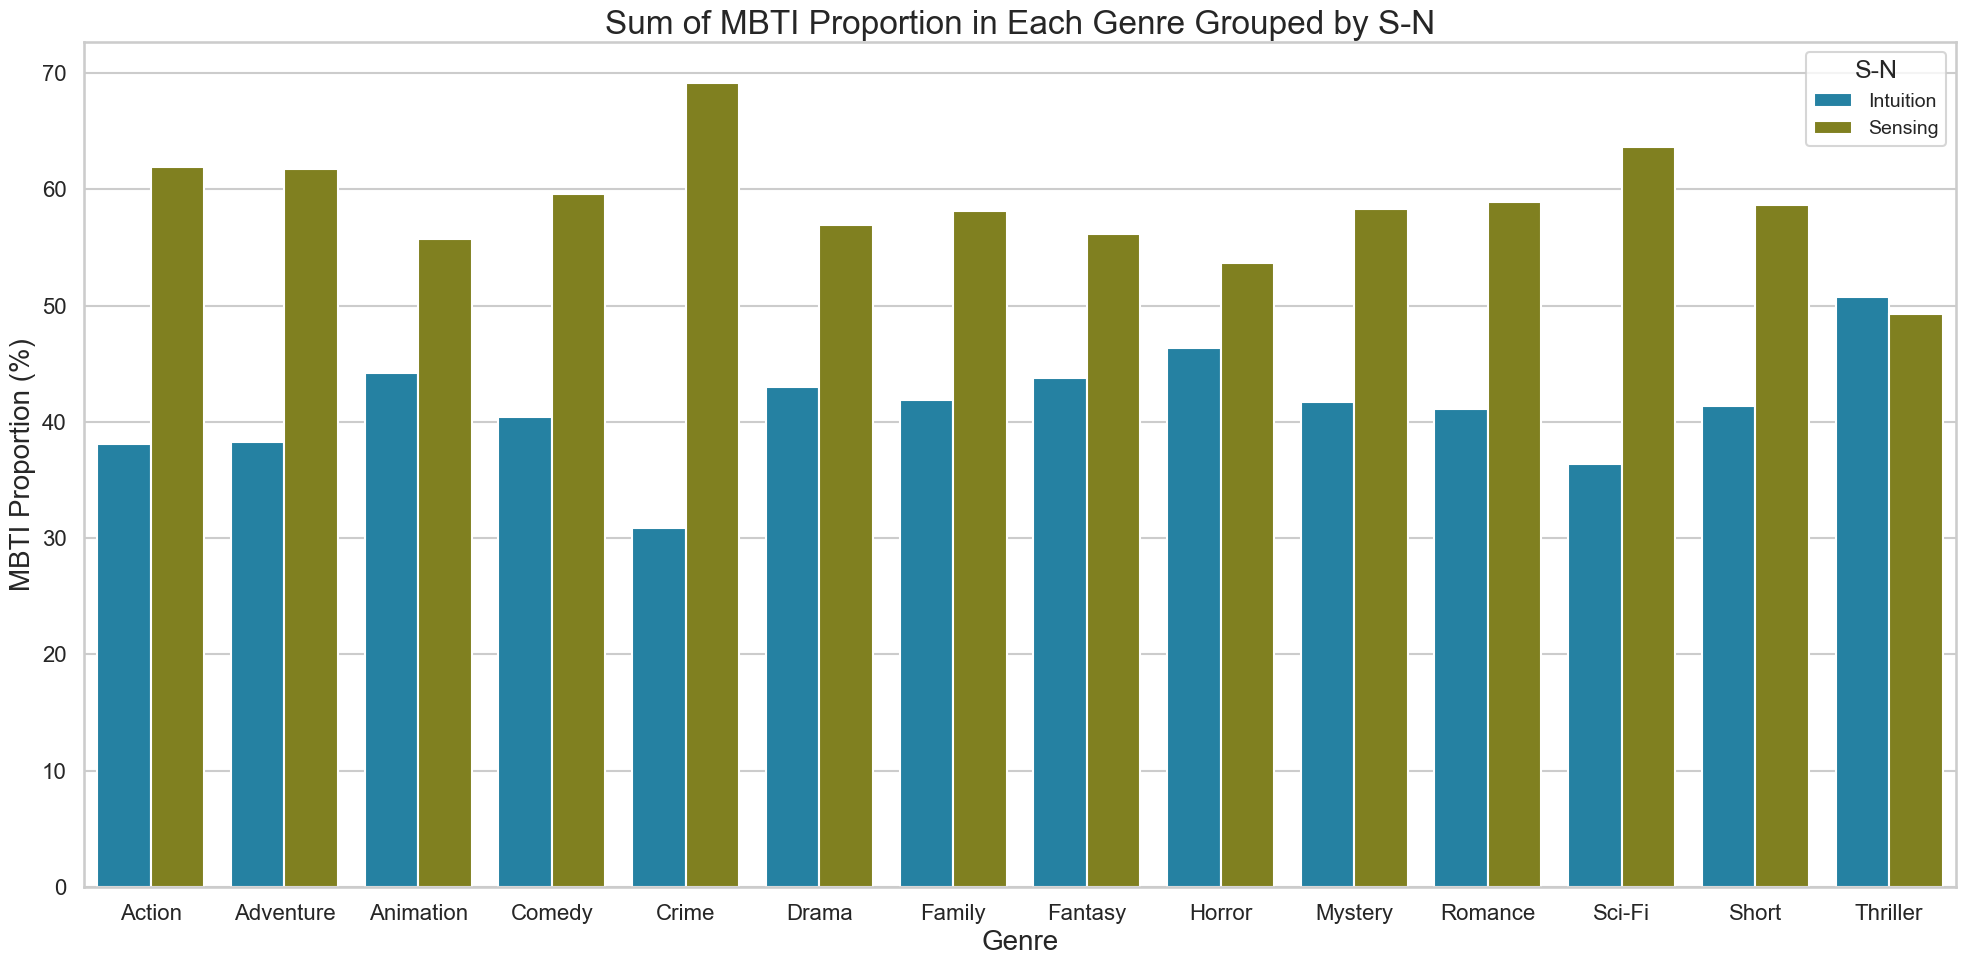

In [188]:
# S-N
plot_mbti_proportions_genre(mbti_count_by_genre, 'S-N',"Sum of MBTI Proportion in Each Genre Grouped by S-N", colors=("#108BB7", "#909010"))

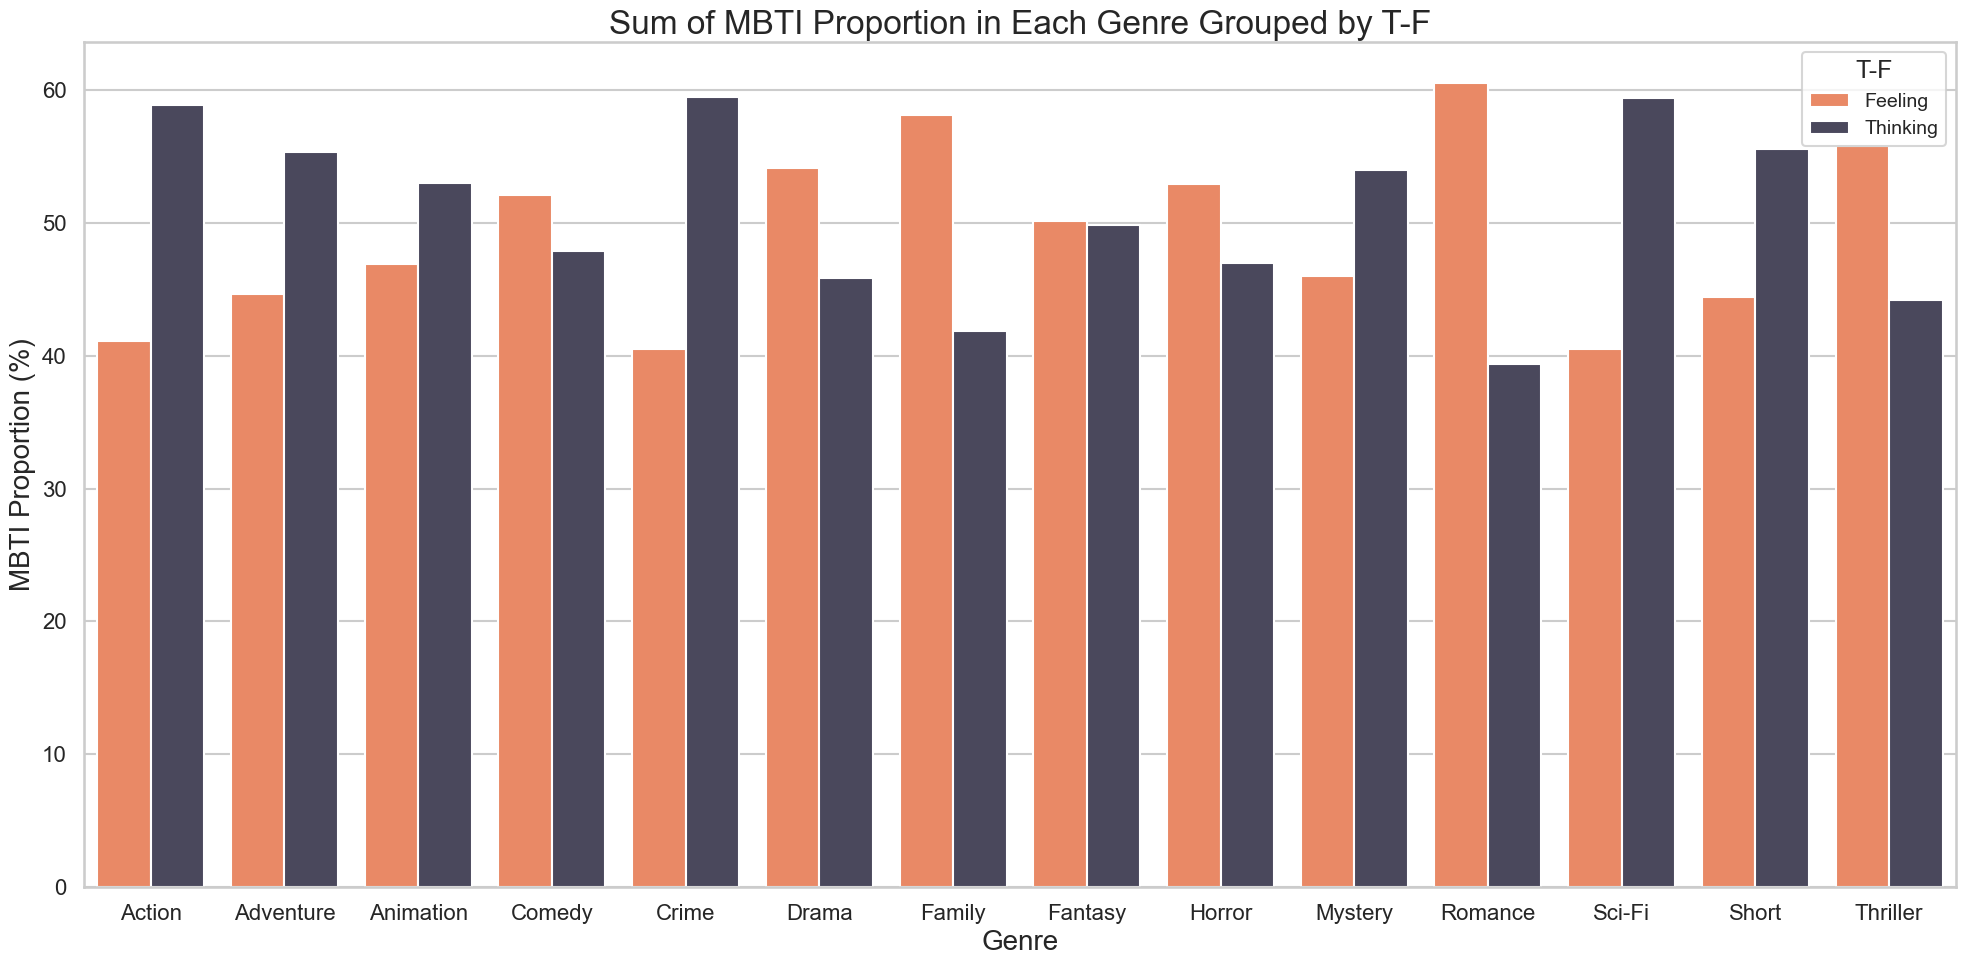

In [189]:
# T-F
plot_mbti_proportions_genre(mbti_count_by_genre, 'T-F',"Sum of MBTI Proportion in Each Genre Grouped by T-F", colors=("#FF7F50", "#47455F"))

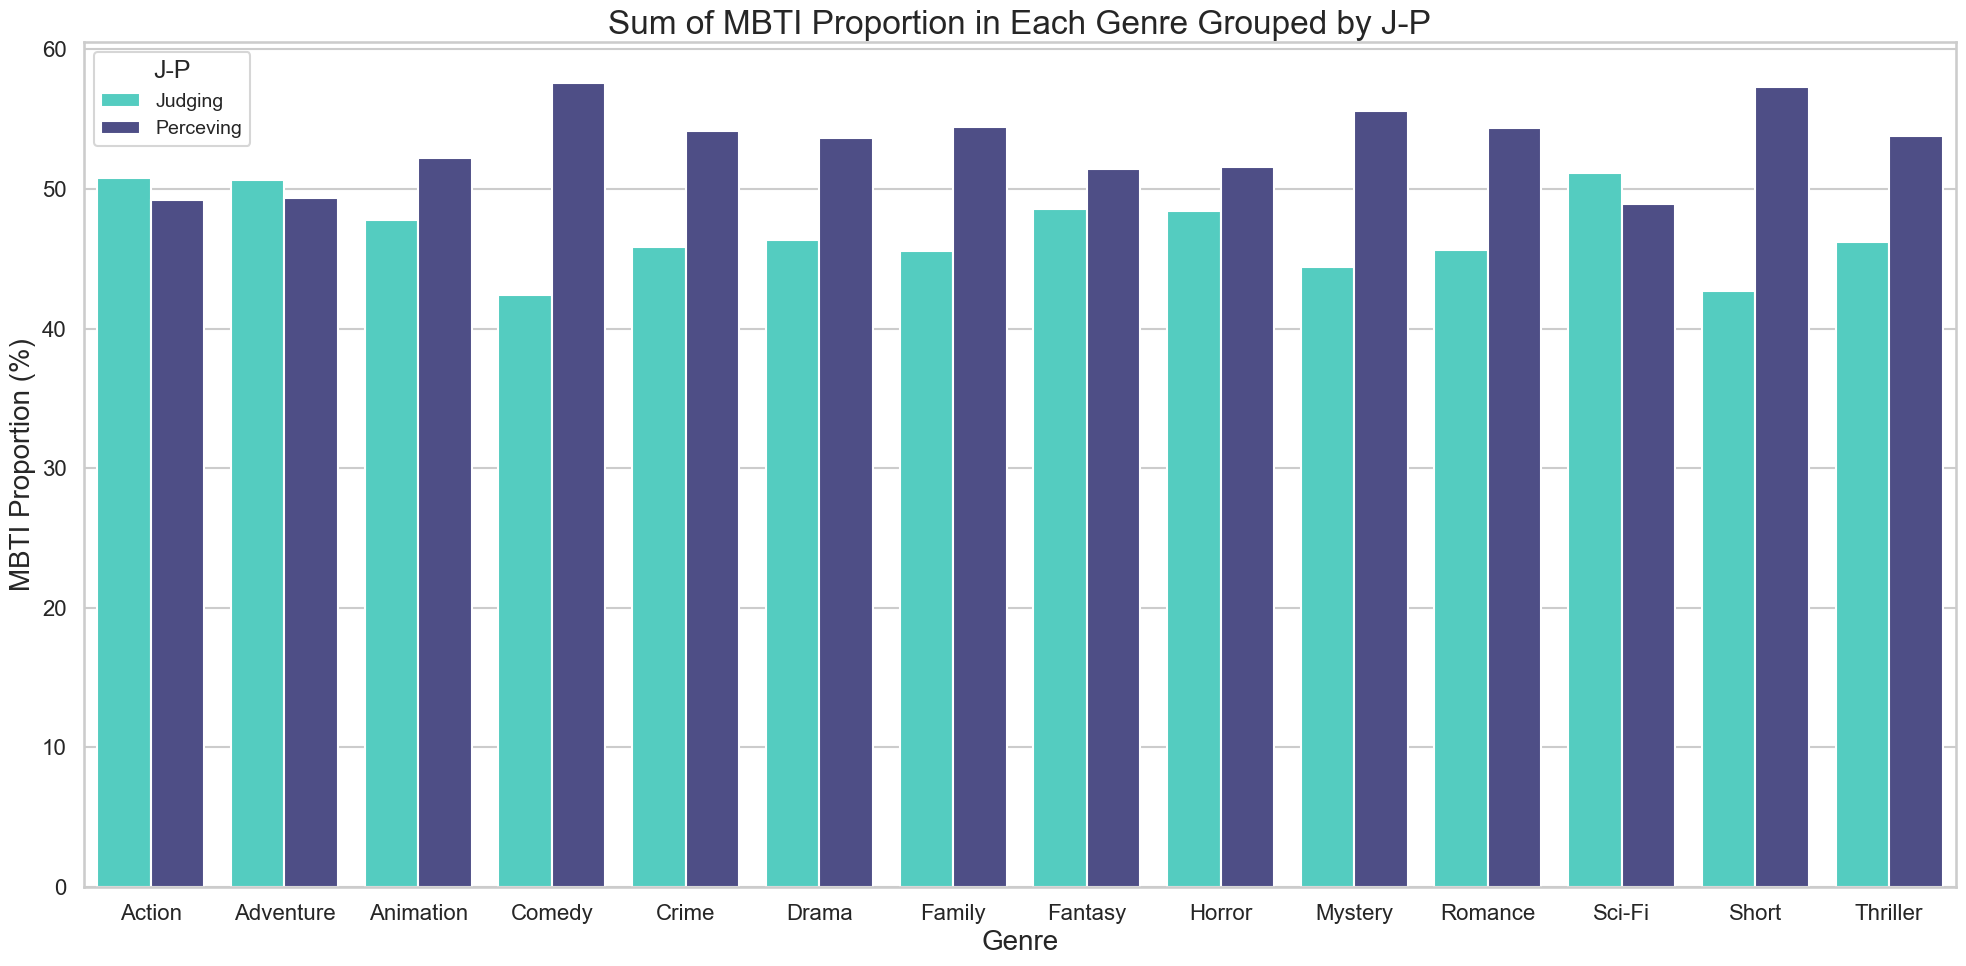

In [190]:
# J-P
plot_mbti_proportions_genre(mbti_count_by_genre, 'J-P',"Sum of MBTI Proportion in Each Genre Grouped by J-P", colors=("#40E0D0", "#444490"))

<Figure size 1800x1000 with 0 Axes>

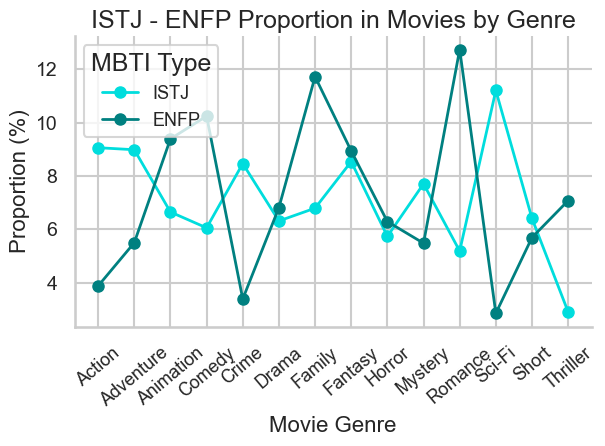

In [191]:
# Filtering for ISTJ and ENFP
filtered_df = mbti_count_by_genre[mbti_count_by_genre['mbti'].isin(['ISTJ', 'ENFP'])]

# Pivoting the DataFrame and reordering columns for correct legend
pivot_df = filtered_df.pivot(index='genre', columns='mbti', values='genre_by_mbti_proportion')
pivot_df = pivot_df[['ISTJ', 'ENFP']]  # Ensuring ISTJ is first and ENFP is second

# Adjusting the plot to make it wider
plt.figure(figsize=(18, 10))  # Increased width
sns.set_style("whitegrid")

# Line plot with wider plot size
ax = pivot_df.plot(kind='line', marker='o', color=['#00DDDD', '#008080'], linewidth=2, markersize=8)

# Customizing the plot with wider size
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('Proportion (%)', fontsize=16)
plt.title('ISTJ - ENFP Proportion in Movies by Genre', fontsize=18)
plt.xticks(rotation=40, ticks=range(len(pivot_df.index)), labels=pivot_df.index, fontsize=13)
plt.yticks(fontsize=14)
ax.legend(['ISTJ', 'ENFP'], title='MBTI Type', fontsize=13)
sns.despine()

# Showing the plot with the corrected legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/Genre/ISTJ-ENFP_genre.png", dpi=300)  # Increase the dpi for better quality

plt.show()

# Geographic and MBTI - Xuhui 'Daniel' Zhan

In [192]:
# Read the data
map_data_path = 'data/cleaned/df_imdb_map.csv'
mbti_data_path = 'data/cleaned/df_mbti.csv'
fig_save_path = "images/Geographical"

In [193]:
# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(set(world['continent']))

# Only keep the continents
world = world[world['continent'].isin(['Asia', 'Oceania', 'Seven seas (open ocean)', 'Europe', 'South America', 'North America', 'Africa'])]

df_imdb_map = pd.read_csv(map_data_path)

df_mbti = pd.read_csv(mbti_data_path)

{'Seven seas (open ocean)', 'Africa', 'North America', 'South America', 'Oceania', 'Antarctica', 'Asia', 'Europe'}


/var/folders/br/n0gxlymn0t53y30rm6v_3swc0000gn/T/ipykernel_10551/1765966519.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [194]:
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [195]:
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()
average_scores_revenues.head()

,country,score,revenue
0,AR,66.073171,4.565608e+08
1,AT,67.000000,7.228277e+07
2,AU,66.706039,1.929454e+08
3,BE,55.571429,3.283100e+08
4,BO,52.000000,6.383325e+08


### Overview by country

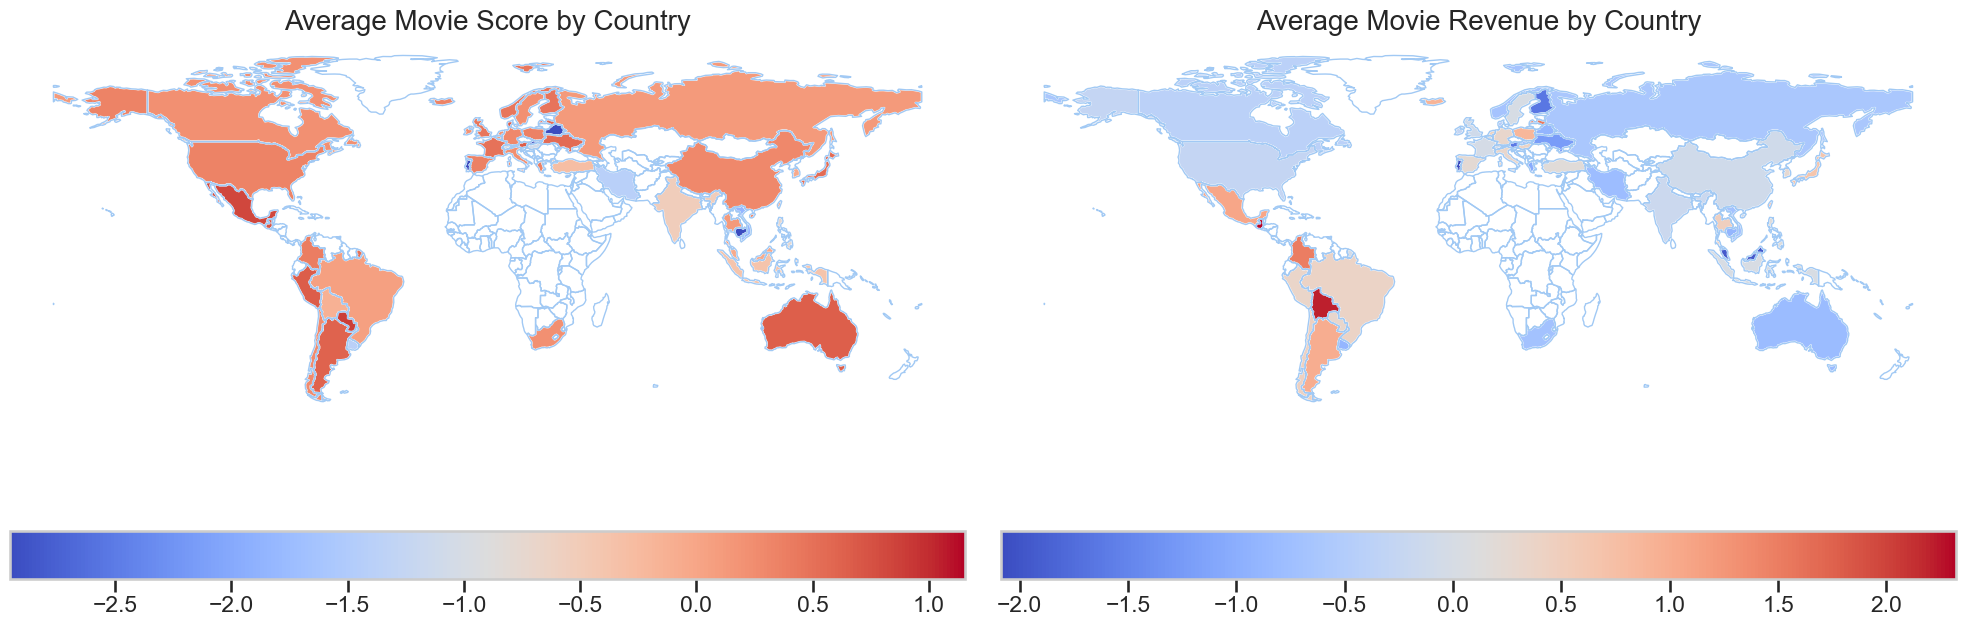

In [196]:
# Creating a mapping of country codes in the movie dataset to country names in the world map dataset
# This requires some knowledge of country codes and names
country_mapping = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BY': 'Belarus',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IR': 'Iran',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JP': 'Japan',
    'KH': 'Cambodia',
    'KR': 'South Korea',
    'LV': 'Latvia',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'RU': 'Russia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SU': 'Soviet Union',
    'TH': 'Thailand',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'US': 'United States of America',
    'UY': 'Uruguay',
    'VN': 'Vietnam',
    'XC': 'Czechoslovakia',
    'ZA': 'South Africa'
}

# Mapping the country codes to country names in the movie dataset
df_imdb_map['country'] = df_imdb_map['country'].map(country_mapping).fillna(df_imdb_map['country'])

# Now let's try merging again and plotting on the map
# Merging our movie data with the world map data again

# Creating a dataframe for average score and revenue by country to merge with the world map
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Standardizing the data
average_scores_revenues['score'] = StandardScaler().fit_transform(average_scores_revenues[['score']])
average_scores_revenues['revenue'] = StandardScaler().fit_transform(average_scores_revenues[['revenue']])

# Merging with the world map data
world_average = world.merge(average_scores_revenues, left_on='name', right_on="country", how='left')

# Set sns style
sns.set_style('whitegrid')

# print(world.head())

# Plotting the data on the world map
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for average movie score by country
world_average.boundary.plot(ax=axes[0], linewidth=1)
world_average.plot(column='score', ax=axes[0], legend=True, legend_kwds={'orientation': "horizontal"}, cmap='coolwarm')
axes[0].set_title('Average Movie Score by Country', fontsize=20)
axes[0].axis('off')

# Plot for average movie revenue by country
world_average.boundary.plot(ax=axes[1], linewidth=1)
world_average.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={ 'orientation': "horizontal"}, cmap="coolwarm")
axes[1].set_title('Average Movie Revenue by Country', fontsize=20)
axes[1].axis('off')
plt.tight_layout()
plt.savefig('images/Geographic/Score_Revenue_Country.png')  # Save the graph as an image file
plt.show()

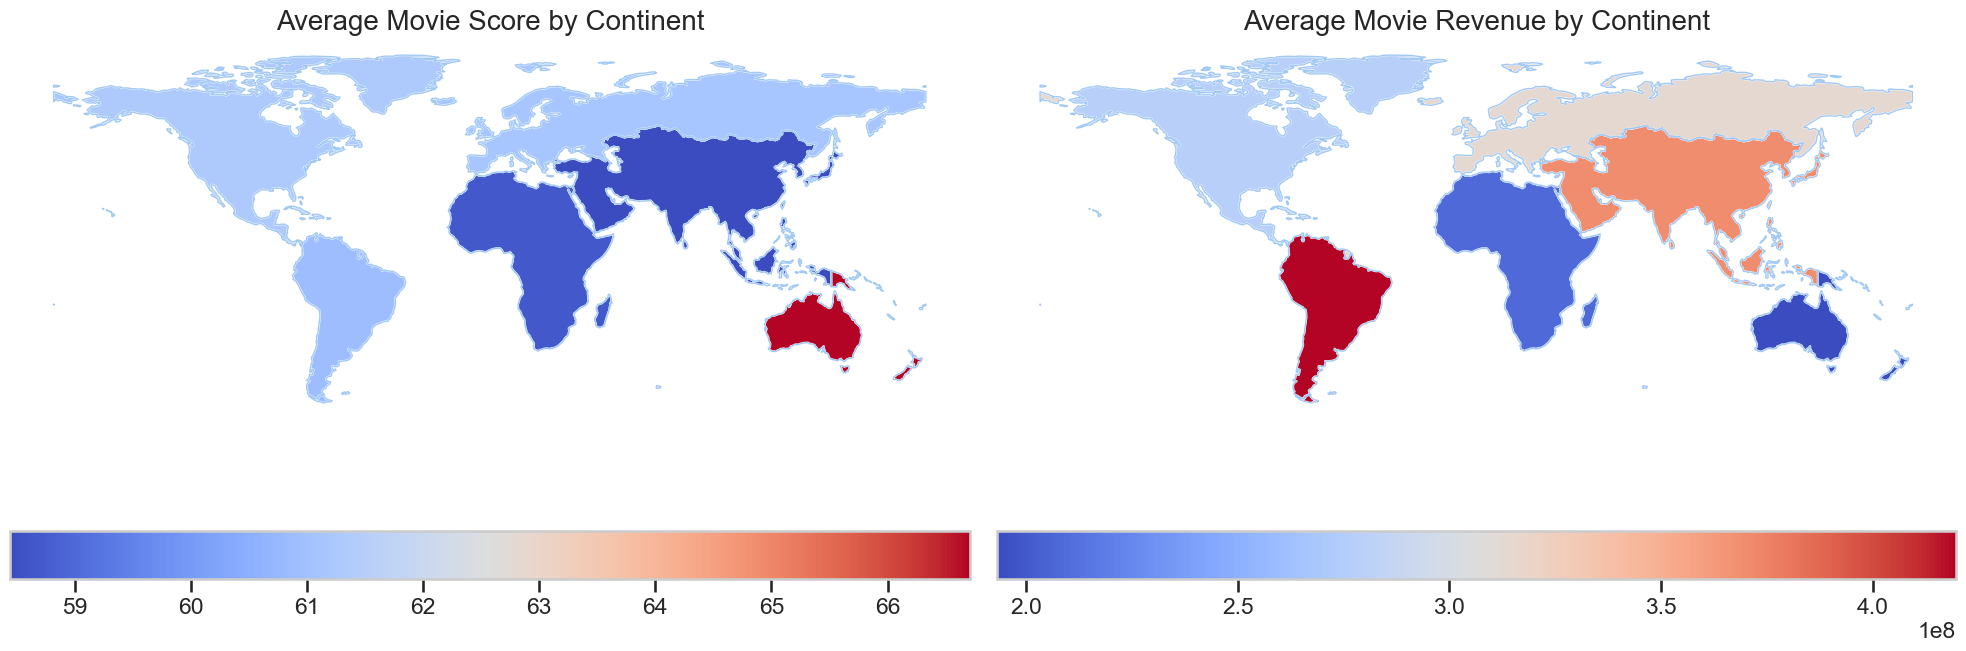

In [197]:
# instead of grouping by country, we can group by continent
# Creating a dataframe for average score and revenue by continent to merge with the world map
# Create a continent column in the movie dataset 
# This requires some knowledge of country codes and names
#Creating a mapping of countries to continents
country_continent_mapping = world[['name', 'continent']].drop_duplicates().set_index('name')['continent'].to_dict()

# Mapping the countries in the movie dataset to continents
df_imdb_map['continent'] = df_imdb_map['country'].map(country_continent_mapping)

# Grouping by continent and calculating average score and revenue
continent_averages = df_imdb_map.groupby('continent').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Merging the aggregated data with the world map data frame for continents
world_continents = world[['continent', 'geometry']].dissolve(by='continent')

# Merging the aggregated data with the world map data for continents
world_continents = world_continents.merge(continent_averages, left_on='continent', right_on='continent', how='left')

# Plotting the data on the world map for continents
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for average movie score by continent
world_continents.boundary.plot(ax=axes[0], linewidth=1)
world_continents.plot(column='score', ax=axes[0], legend=True, legend_kwds={'orientation': "horizontal"}, cmap='coolwarm')
axes[0].set_title('Average Movie Score by Continent', fontsize=20)
axes[0].axis('off')

# Plot for average movie revenue by continent
world_continents.boundary.plot(ax=axes[1], linewidth=1)
world_continents.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={'orientation': "horizontal"}, cmap="coolwarm")
axes[1].set_title('Average Movie Revenue by Continent', fontsize=20)
axes[1].axis('off')

plt.tight_layout()
plt.savefig('images/Geographic/Score_Revenue_Continent.png')  # Save the graph as an image file
plt.show()

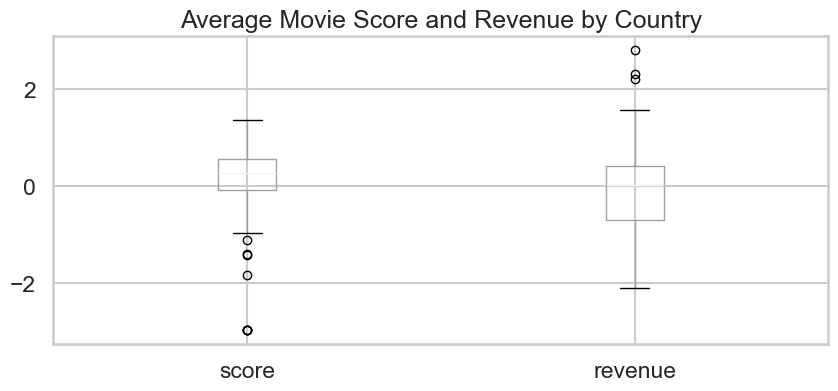

In [198]:
# Boxplot for average movie score and revenue by country
average_scores_revenues.boxplot(column=['score', 'revenue'], figsize=(10, 4))
# sns.boxplot(x="country", y=["score", 'revenue'], data=average_scores_revenues)
plt.title('Average Movie Score and Revenue by Country')
plt.savefig('images/Geographic/Average-Movie-Score&Revenue-by-Country.png')  # Save the graph as an image file
plt.show()

In [199]:
# Generating the count for each of the 16 MBTI personalities in each movie
mbti_counts = df_mbti.groupby(['movie_name', 'mbti']).size().unstack(fill_value=0)

mbti_counts_reset = mbti_counts.reset_index()
mbti_counts_reset.columns.name = None

# Displaying the counts
mbti_counts_reset.head()

,movie_name,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,#Alive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,...And Justice For All,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,07/27/1978,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,10 Cloverfield Lane,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
4,10 Things I Hate About You,1,0,0,1,1,0,0,0,0,2,1,0,0,0,0,1


In [200]:
# merge the data to the original movie dataset
df_imdb_mbti = df_imdb_map.merge(mbti_counts_reset, left_on='movie_name', right_on='movie_name', how='left')

In [201]:
df_imdb_mbti.drop('Unnamed: 0', axis=1, inplace=True)

In [202]:
df_imdb_mbti.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,Creed Iii,2023-03-02,73.0,"Drama, Action",75000000.0,2.716167e+08,Australia,2023.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avatar: The Way Of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,Australia,2022.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,Australia,2023.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,Australia,2023.0,Oceania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Supercell,2023-03-17,61.0,Action,77000000.0,3.409420e+08,United States of America,2023.0,North America,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# fillna in each columns with the mean of the column values group by country
numeric_columns = df_imdb_mbti.select_dtypes(include=['number']).columns
df_imdb_mbti.dropna(subset=numeric_columns, inplace=True)

In [204]:
df_imdb_mbti.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
11,The Exorcist,2022-11-02,55.0,Horror,12000000.0,4.282145e+08,Mexico,2022.0,North America,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,A Bronx Tale,1994-05-20,78.0,"Drama, Crime",10000000.0,1.728790e+07,Australia,1994.0,Oceania,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68,Avatar,2009-12-17,76.0,"Action, Adventure, Fantasy, Science Fiction",237000000.0,2.923706e+09,Australia,2009.0,Oceania,1.0,...,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0
75,John Wick,2014-11-26,74.0,"Action, Thriller",30000000.0,7.595880e+07,Australia,2014.0,Oceania,1.0,...,2.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0
95,Scream,2022-01-13,67.0,"Horror, Mystery, Thriller",24000000.0,1.388748e+08,Australia,2022.0,Oceania,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [205]:
print(len(df_imdb_mbti))

2339


In [206]:
df_imdb_mbti.to_csv("data/cleaned/df_map_mbti.csv")

### Investigate the reprensentative countries

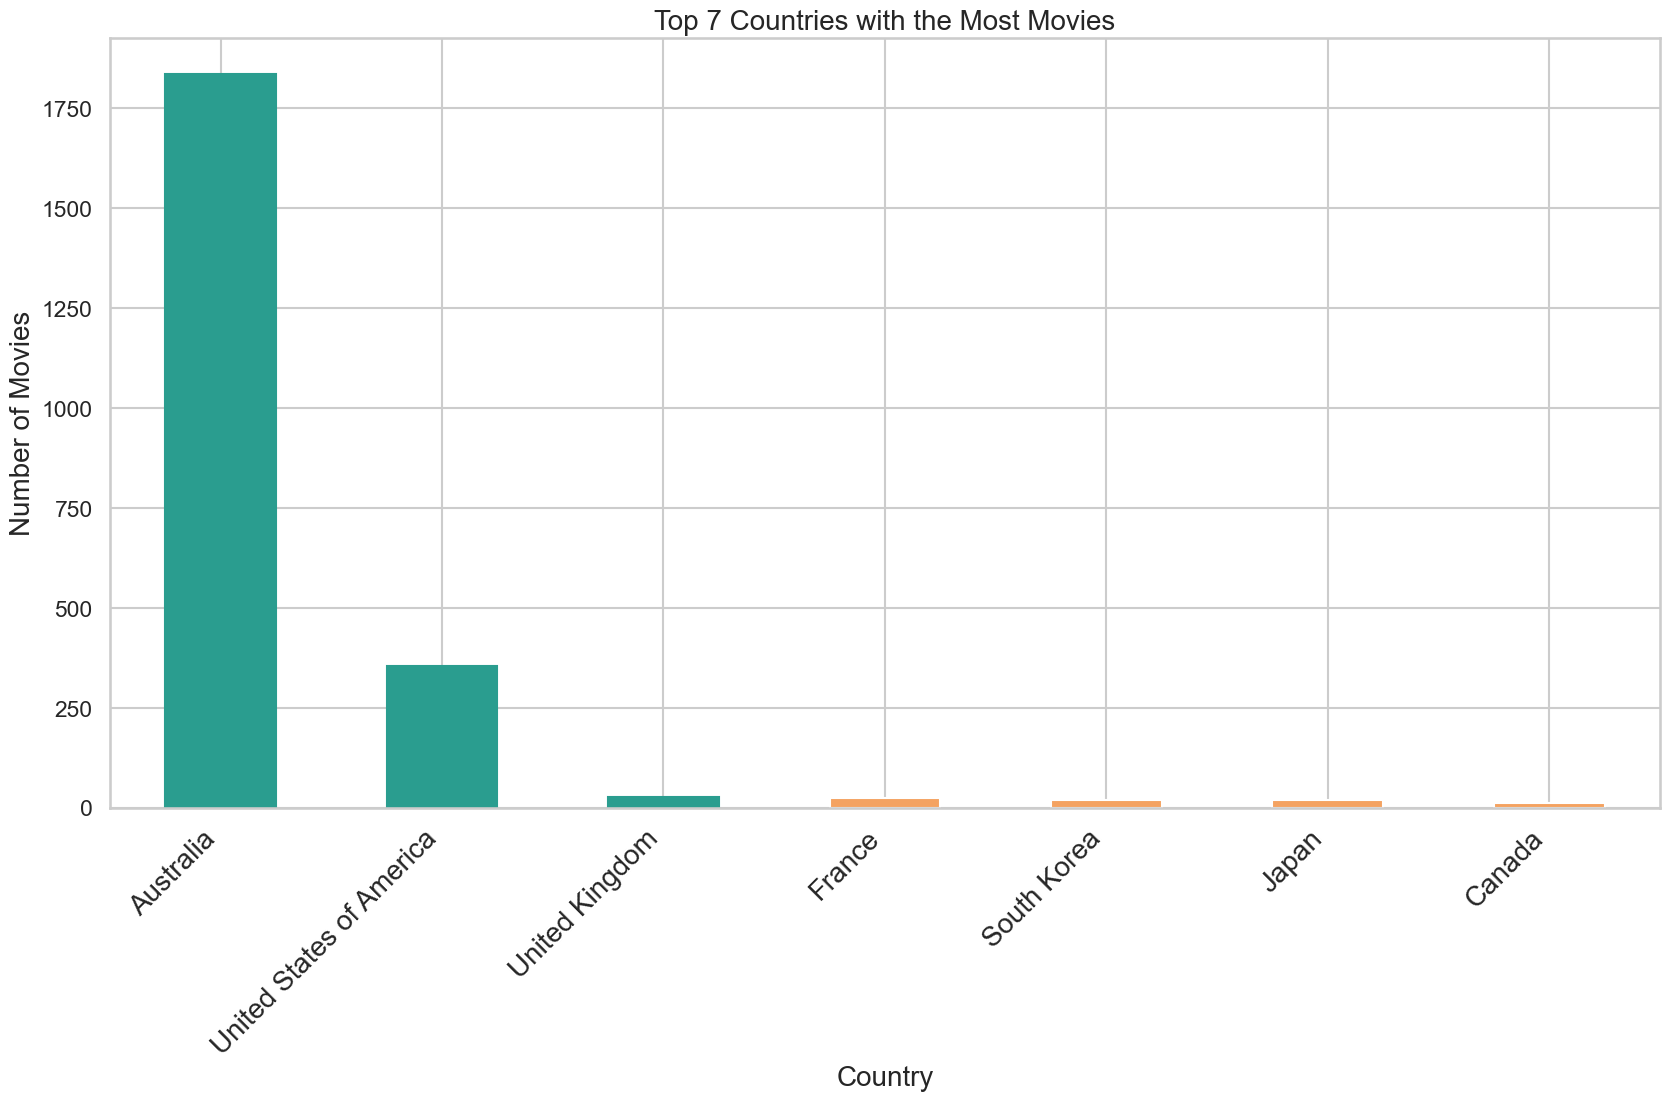

In [207]:
## List the top 7 countries with the most movies
top_count = df_imdb_mbti['country'].value_counts().head(7)

## Plot them and highlight the top 3
plt.figure(figsize=(20, 10))
ax = plt.gca()
top_count.plot.bar(ax=ax, color="#F4A261")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=20)
ax.set_title('Top 7 Countries with the Most Movies',fontsize=20)
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=20)

# Highlighting the top 3 countries
for i in range(3):
    ax.get_children()[i].set_color('#2A9D8F')

plt.savefig('images/Geographic/Count_Country.png')  # Save the graph as an image file


In [208]:
## Plot the top 3 count in australia and United States of America
top_3_countries = ['Australia', 'United States of America', 'United Kingdom']
df_imdb_mbti_top3 = df_imdb_mbti[df_imdb_mbti['country'].isin(top_3_countries)]

df_imdb_mbti_top3.columns

Index(['movie_name', 'release_date', 'score', 'genre', 'budget', 'revenue',
       'country', 'release_year', 'continent', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP',
       'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP'],
      dtype='object')

In [209]:
personalities_list = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ',
       'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
       'ISTJ', 'ISTP']
print(len(personalities_list))

16


### Distributions of MBTI in top3 countries

In [210]:
# Gradient Color generation
import numpy as np
# Reattempting the calculation for gradient colors between "#F72585" (pink) and "#4CC9F0" (cyan)

# Convert hex colors to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

start_color_pink_cyan = hex_to_rgb("#03045E")
end_color_pink_cyan = hex_to_rgb("#CAF0F8")

# Convert the RGB tuples to numpy arrays
start_color_pink_cyan_np = np.array(start_color_pink_cyan)
end_color_pink_cyan_np = np.array(end_color_pink_cyan)

# Initialize array for RGB values of the gradient
gradient_rgb_pink_cyan = np.zeros((16, 3), dtype=int)

gradient_steps = np.linspace(0, 1, 16)

# Interpolate between pink and cyan colors
for i, step in enumerate(gradient_steps):
    gradient_rgb_pink_cyan[i] = np.round(start_color_pink_cyan_np * (1 - step) + end_color_pink_cyan_np * step).astype(int)

# Convert RGB values to hexadecimal
gradient_hex_pink_cyan = ['#' + ''.join('{:02x}'.format(val) for val in color) for color in gradient_rgb_pink_cyan]
gradient_hex_pink_cyan

['#03045e',
 '#101468',
 '#1e2373',
 '#2b337d',
 '#384387',
 '#455391',
 '#53629c',
 '#6072a6',
 '#6d82b0',
 '#7a92ba',
 '#88a1c5',
 '#95b1cf',
 '#a2c1d9',
 '#afd1e3',
 '#bde0ee',
 '#caf0f8']

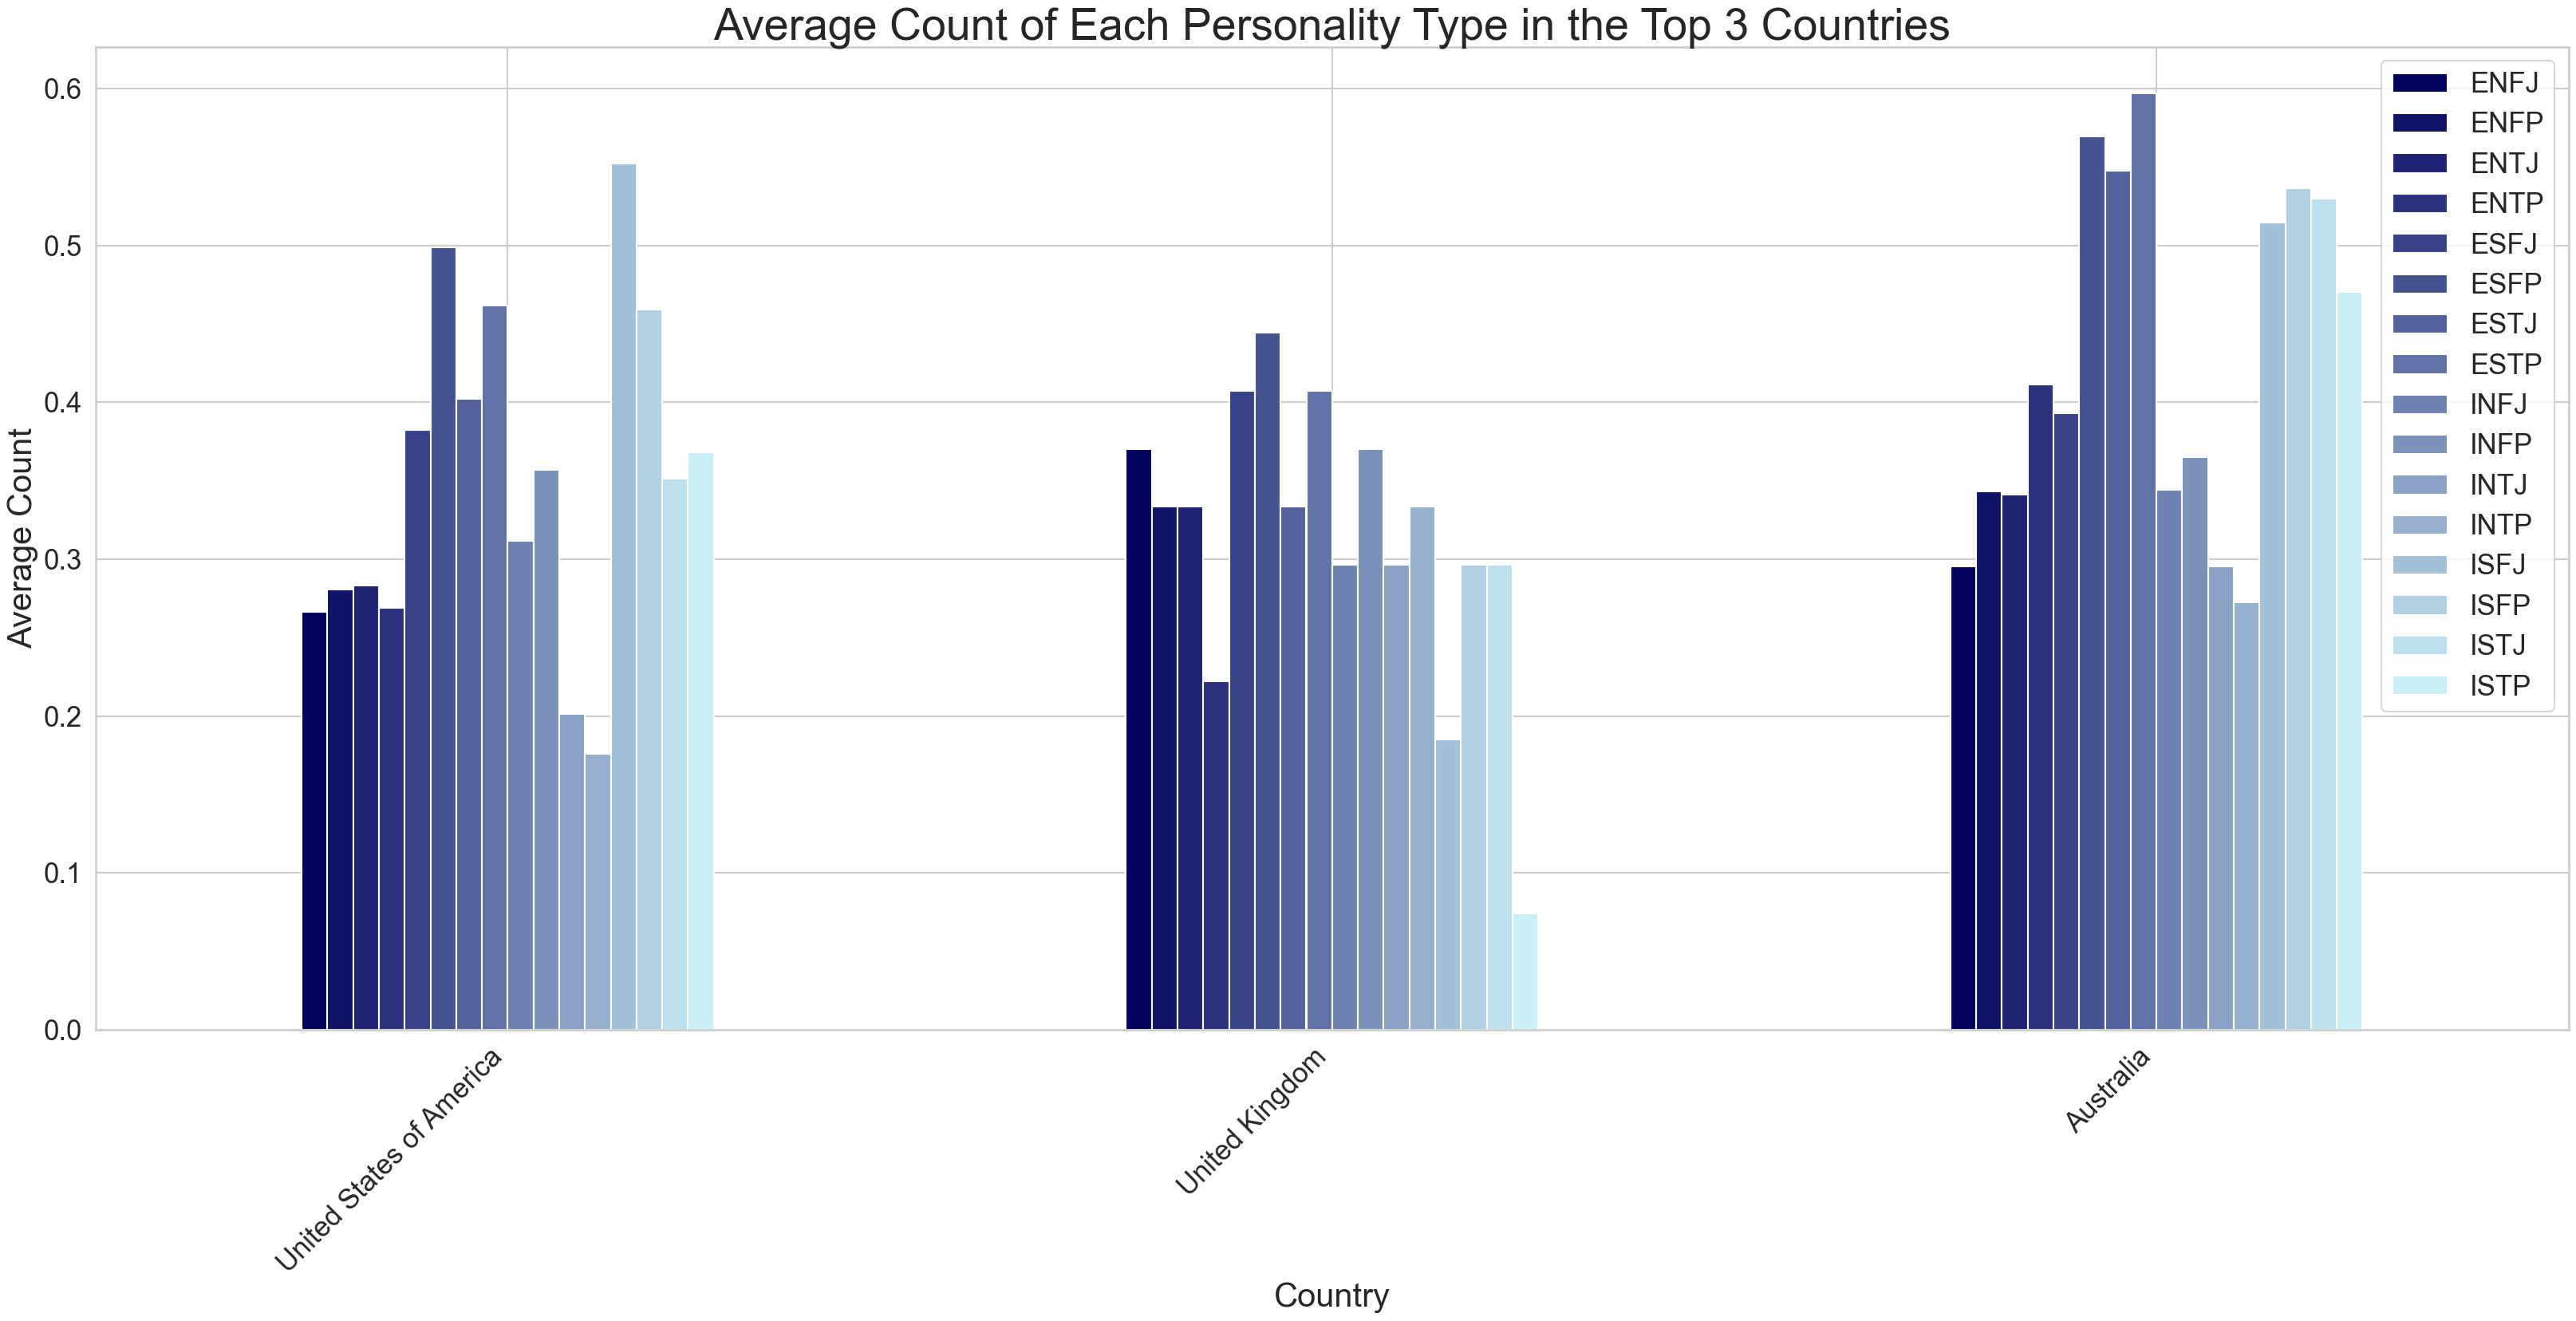

In [211]:
# Set the color style
sns.set_style("whitegrid")

# Plotting the average count of each personality type in the top 3 countries, make it in order
plt.figure(figsize=(40, 16))
ax = plt.gca()
average_count = df_imdb_mbti_top3.groupby('country')[personalities_list].mean().sort_values(by='country', ascending=False).plot.bar(ax=ax, color=['#03045e',
 '#101468',
 '#1e2373',
 '#2b337d',
 '#384387',
 '#455391',
 '#53629c',
 '#6072a6',
 '#6d82b0',
 '#7a92ba',
 '#88a1c5',
 '#95b1cf',
 '#a2c1d9',
 '#afd1e3',
 '#bde0ee',
 '#caf0f8'], fontsize=25)
ax.legend(fontsize=25)
# Plot the three personality types with the highest mean corresponding to each country 
ax.set_autoscale_on(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
ax.set_title('Average Count of Each Personality Type in the Top 3 Countries', fontsize=40)
ax.set_ylabel('Average Count', fontsize=30)
ax.set_xlabel('Country', fontsize=30)
plt.savefig('images/Geographic/MBTI_Count_Country.png')  # Save the graph as an image file
plt.show()


/var/folders/br/n0gxlymn0t53y30rm6v_3swc0000gn/T/ipykernel_10551/3398255632.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['average_mbti'] = filtered_df[mbti_columns].mean(axis=1)


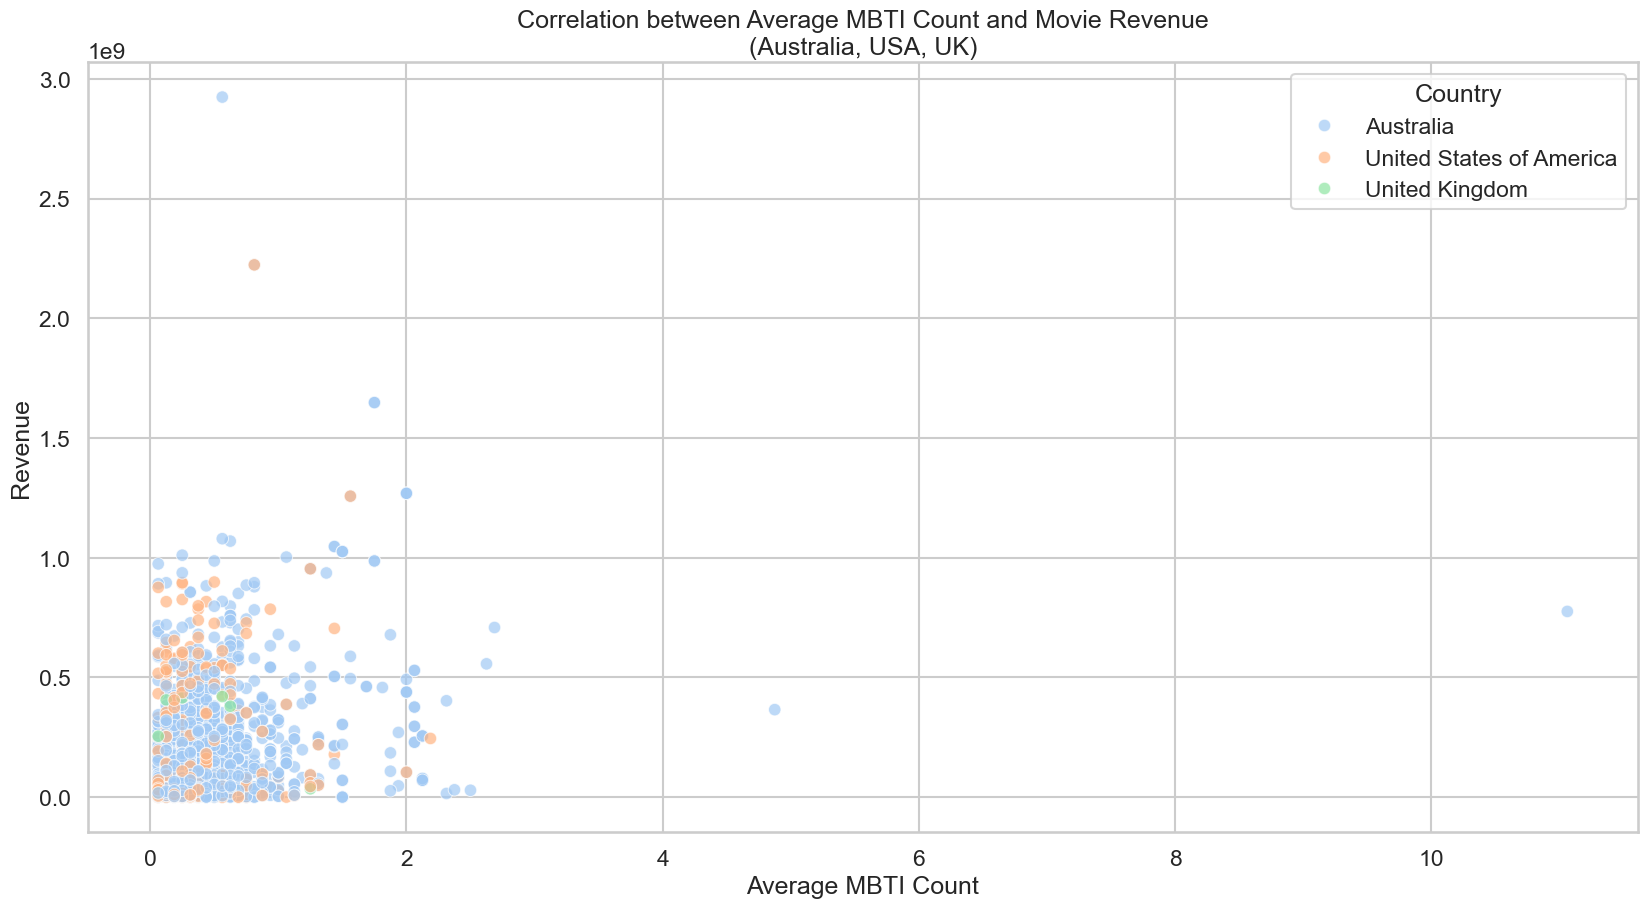

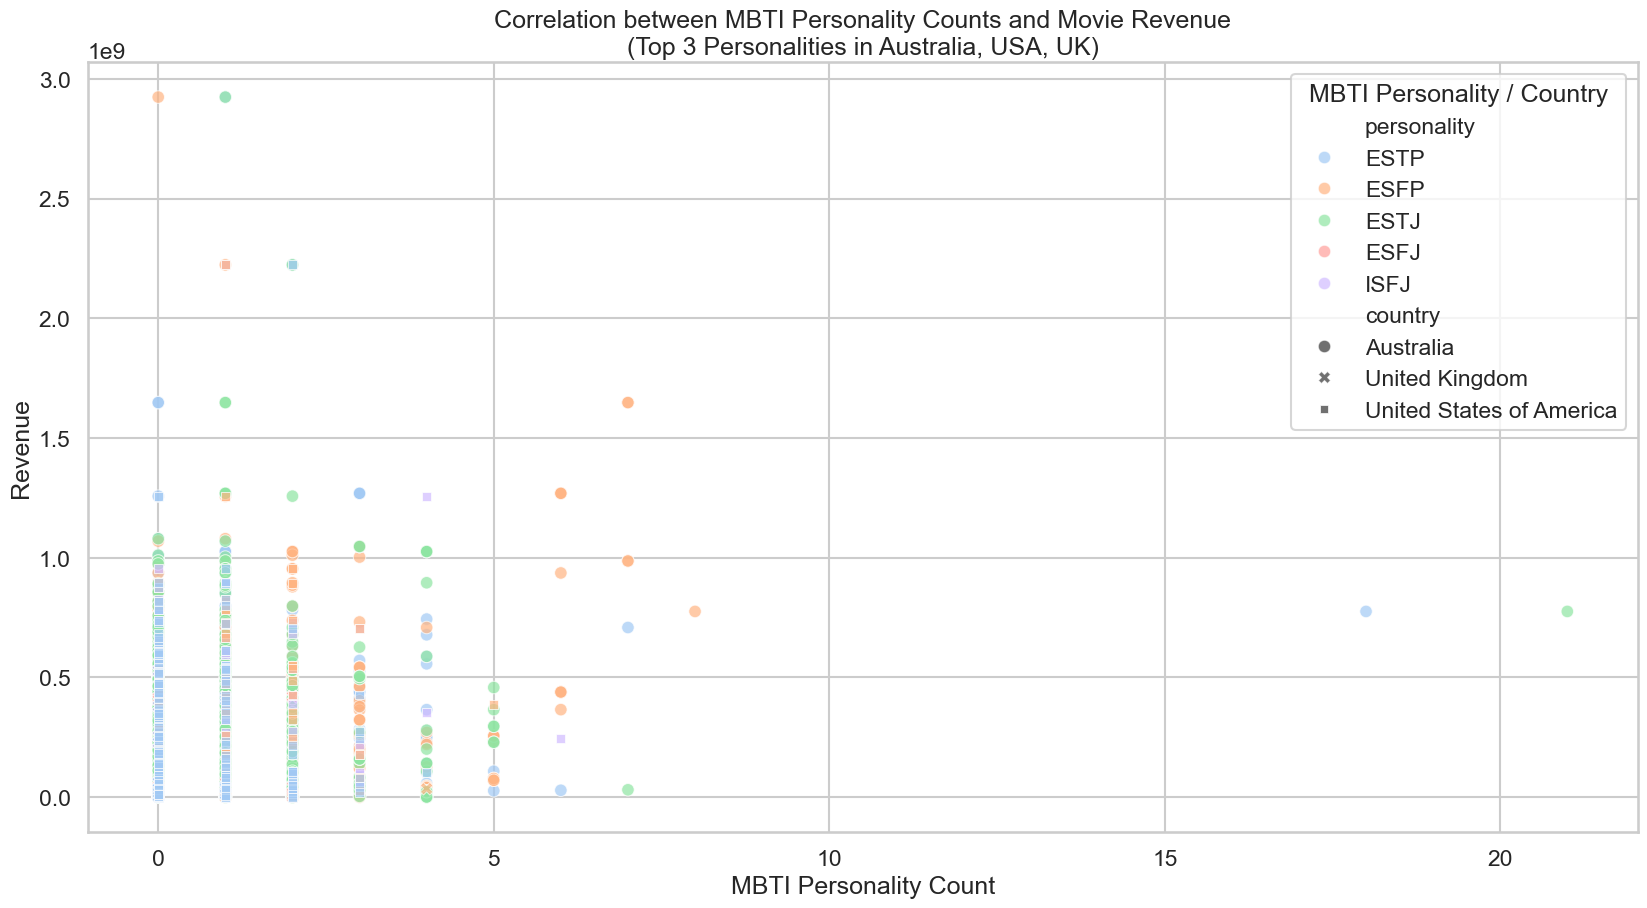

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for movies released in Australia, USA, and Japan
filtered_df = df_imdb_mbti[df_imdb_mbti['country'].isin(['Australia', 'United States of America', 'United Kingdom'])]

# Extracting MBTI columns
mbti_columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

# Calculating the average count for the 16 MBTI personalities for each movie
filtered_df['average_mbti'] = filtered_df[mbti_columns].mean(axis=1)

# Analyzing the correlation between these average counts and the movie revenues
correlation = filtered_df[['average_mbti', 'revenue']].corr()

# Visualizing the findings
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_df, x='average_mbti', y='revenue', hue='country', alpha=0.7)
plt.title('Correlation between Average MBTI Count and Movie Revenue\n(Australia, USA, UK)')
plt.xlabel('Average MBTI Count')
plt.ylabel('Revenue')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# correlation


# Calculating the average count for each MBTI personality in each country
average_mbti_by_country = filtered_df.groupby('country')[mbti_columns].mean()

# Finding the top 3 personalities with the highest average count in each country
top_mbti_countries = average_mbti_by_country.apply(lambda x: x.nlargest(3).index, axis=1)

# Filtering the dataset for these top 3 personalities in each country
filtered_mbti_data = []
for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        temp_df = filtered_df[['country', 'revenue', mbti]]
        temp_df = temp_df[temp_df['country'] == country]
        temp_df.rename(columns={mbti: 'mbti_count'}, inplace=True)
        temp_df['personality'] = mbti
        filtered_mbti_data.append(temp_df)

filtered_mbti_df = pd.concat(filtered_mbti_data)

# Analyzing the correlation between these MBTI counts and the movie revenues
correlation_mbti_revenue = filtered_mbti_df.groupby('personality')[['mbti_count', 'revenue']].corr().iloc[0::2, -1]

# Visualizing the findings
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_mbti_df, x='mbti_count', y='revenue', hue='personality', style='country', alpha=0.7)
plt.title('Correlation between MBTI Personality Counts and Movie Revenue\n(Top 3 Personalities in Australia, USA, UK)')
plt.xlabel('MBTI Personality Count')
plt.ylabel('Revenue')
plt.legend(title='MBTI Personality / Country')
plt.grid(True)
plt.savefig('images/Geographic/MBTI-Count_Corr_Revenue.png')  # Save the graph as an image file
plt.show()

# correlation_mbti_revenue, top_mbti_countries


### Correlation of MBTI and Revenue

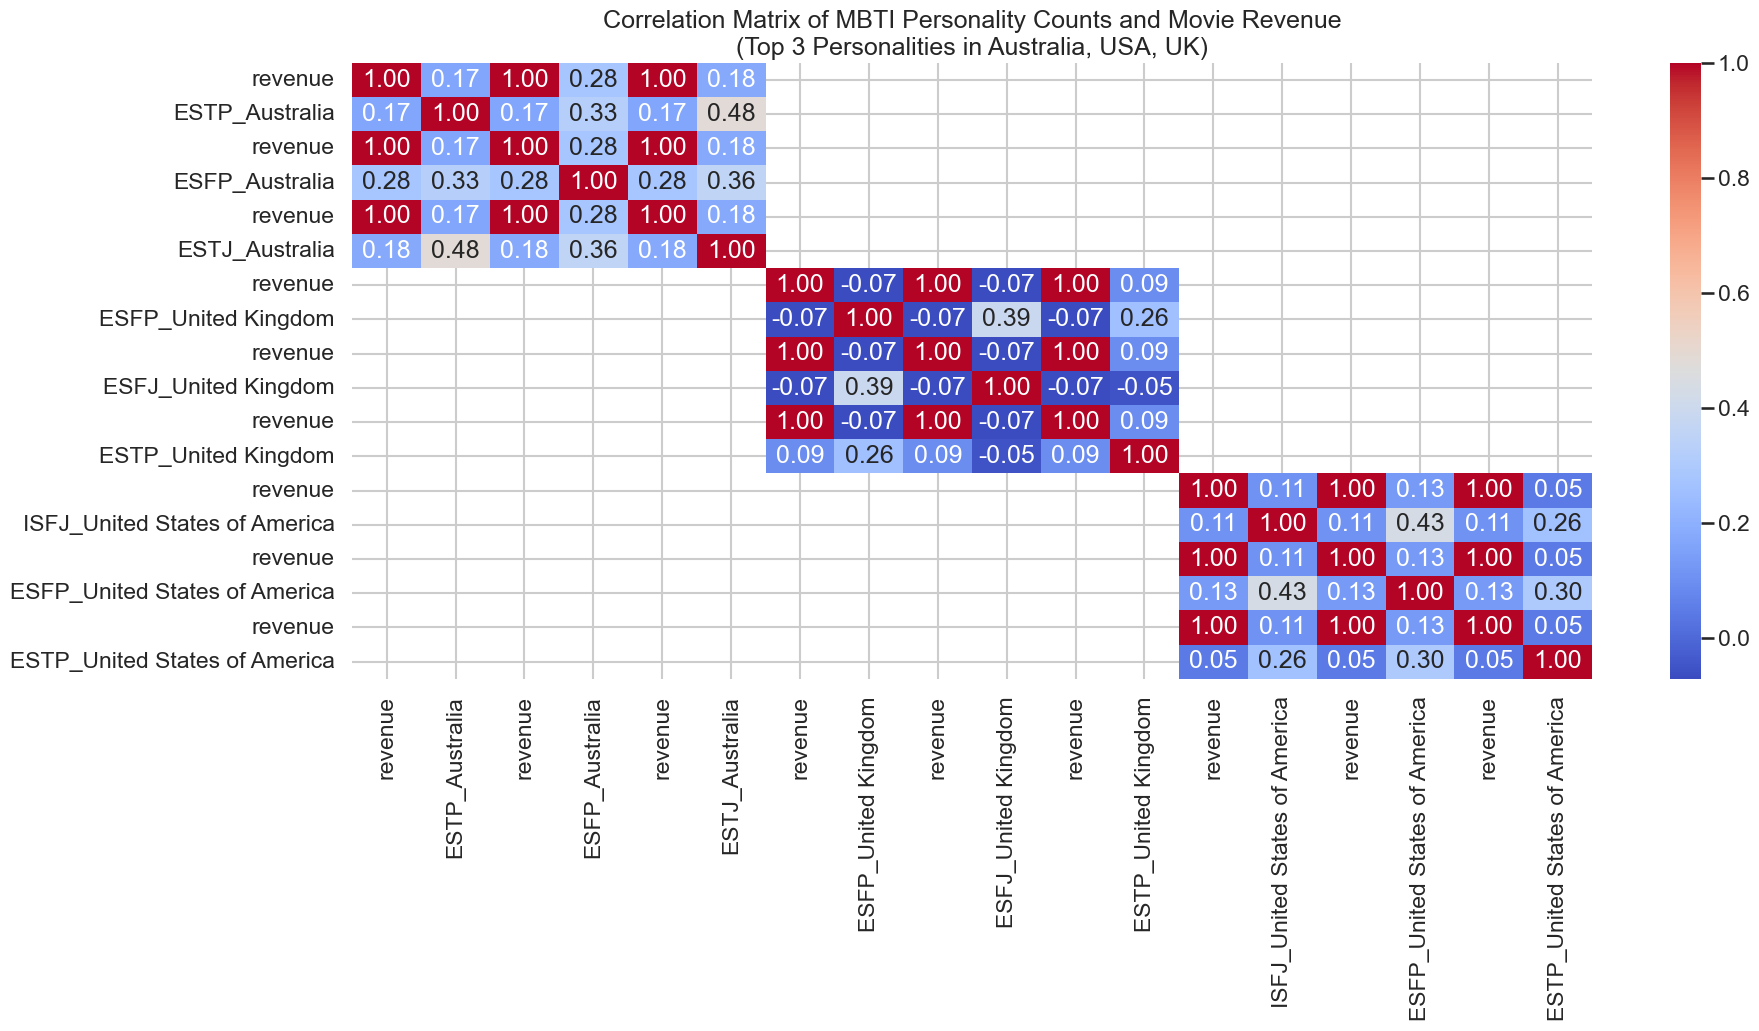

In [213]:
# Creating a new DataFrame for correlation analysis
sns.set_style('whitegrid')
correlation_data = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data.append(country_data[['revenue', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df = pd.concat(correlation_data, axis=1)

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
corr_matrix = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Revenue\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('images/Geographic/Revenue_Corr_Country.png')  # Save the graph as an image file
plt.show()



### Correlation of MBTI and scores

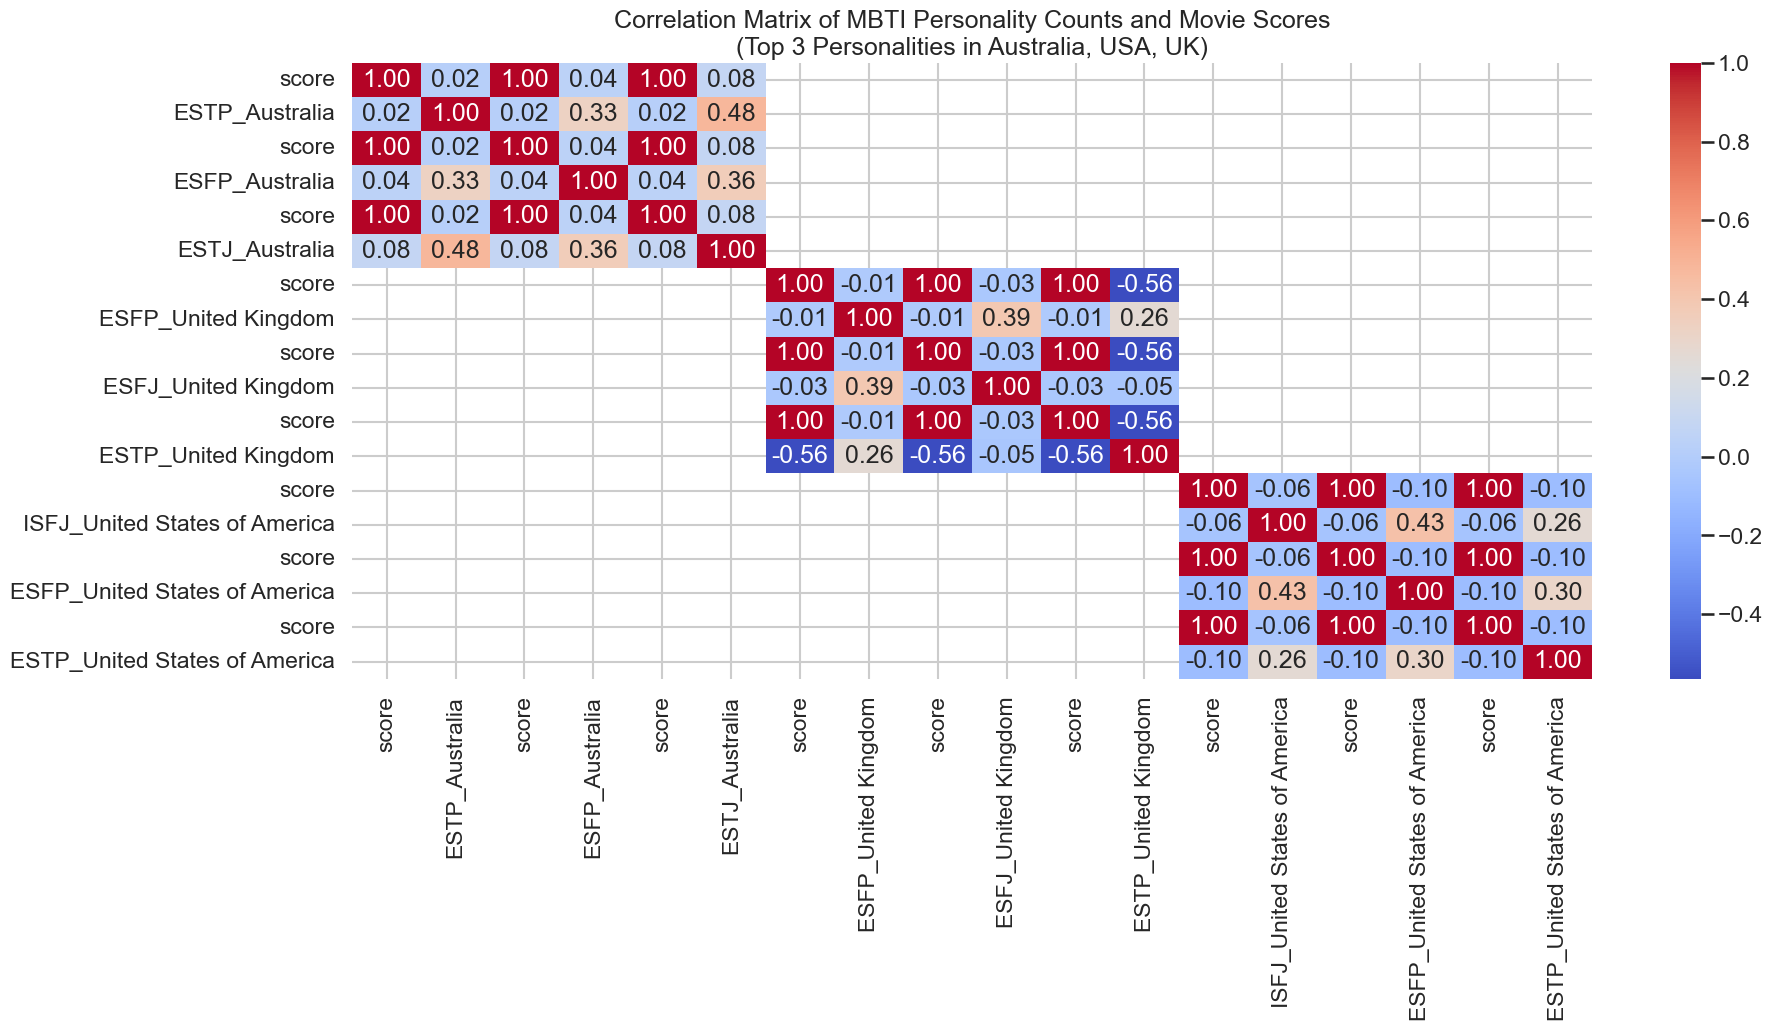

In [214]:
# Creating a new DataFrame for correlation analysis with movie scores
correlation_data_score = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data_score.append(country_data[['score', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df_score = pd.concat(correlation_data_score, axis=1)

# Calculating the correlation matrix
correlation_matrix_score = correlation_df_score.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_score, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Scores\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('images/Geographic/Score_Corr_Country.png')  # Save the graph as an image file
plt.show()



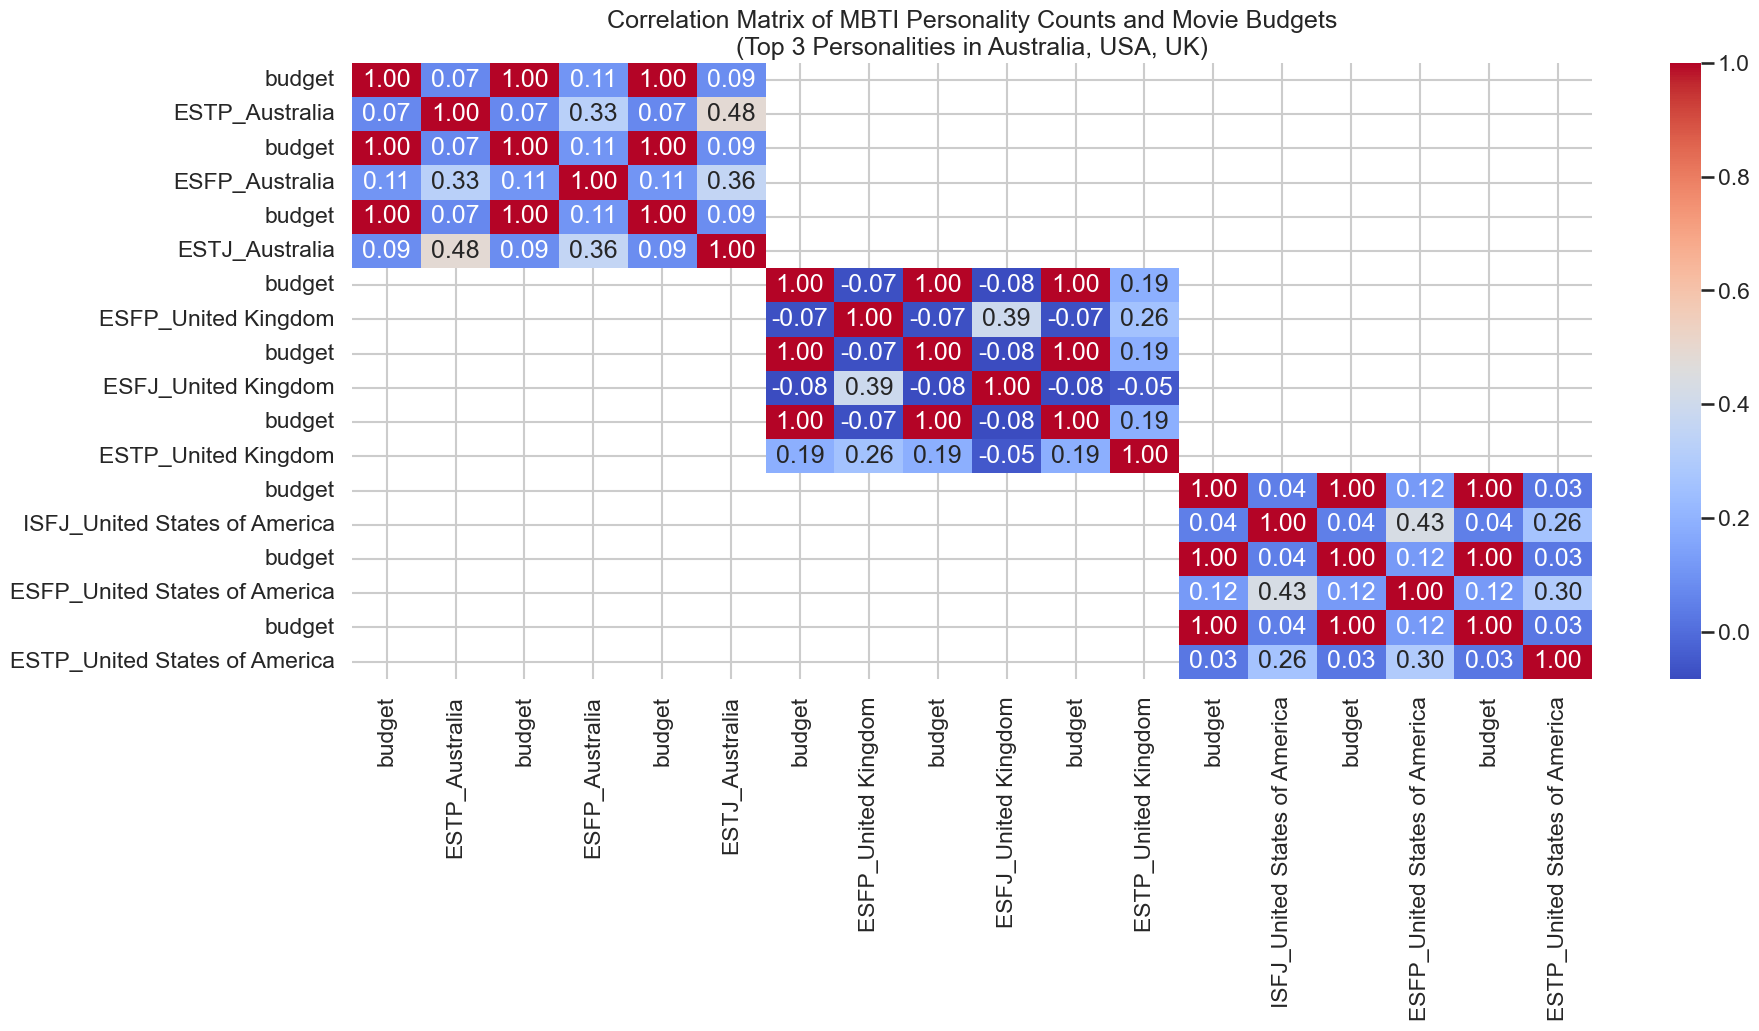

In [215]:
# Creating a new DataFrame for correlation analysis with movie scores
correlation_data_score = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data_score.append(country_data[['budget', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df_score = pd.concat(correlation_data_score, axis=1)

# Calculating the correlation matrix
correlation_matrix_score = correlation_df_score.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_score, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Budgets\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('images/Geographic/Budgets_Corr_Country.png')  # Save the graph as an image file
plt.show()

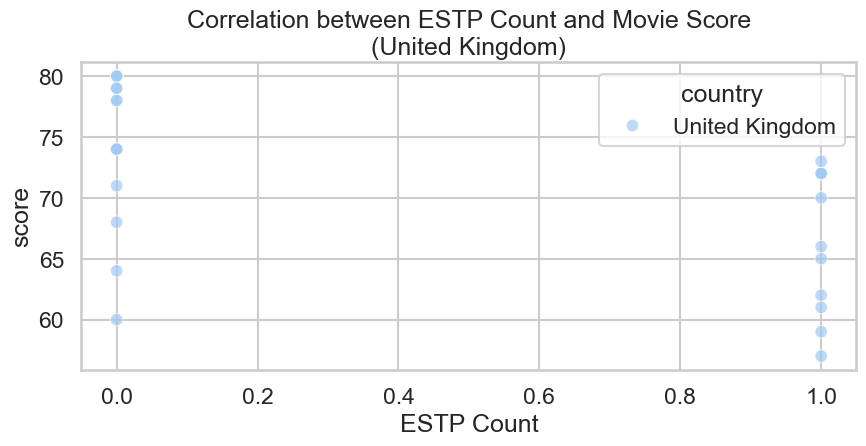

In [216]:
# plot the correlation between score and ESTP in UK
plt.figure(figsize=(10, 4))
sns.scatterplot(data=filtered_df[filtered_df['country'] == 'United Kingdom'], x='ESTP', y='score', hue='country', alpha=0.7)
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom)')
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [217]:
# List the movie with the highest ESTP count in United Kingdom
filtered_df[filtered_df['country'] == 'United Kingdom'].sort_values(by=['ESTP', 'score'], ascending=False).head(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
9087,Becoming Jane,2007-03-09,73.0,"Romance, Drama",16500000.0,39380831.0,United Kingdom,2007.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3125
7567,Dangerous Liaisons,1989-03-10,72.0,"Drama, Romance",24200000.0,10447579.0,United Kingdom,1989.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500
7568,Dangerous Liaisons,1989-03-10,72.0,"Drama, Romance",14000000.0,34700000.0,United Kingdom,1989.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500
8130,Jane Eyre,2011-09-09,72.0,"Drama, Romance",26648000.0,34710627.0,United Kingdom,2011.0,Europe,1.0,...,1.0,1.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,1.2500
5684,The Duchess,2008-09-05,70.0,"Drama, History, Romance",27000000.0,45160110.0,United Kingdom,2008.0,Europe,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.2500
5541,Girl With A Pearl Earring,2004-01-16,66.0,"Drama, Romance",12000000.0,43153588.0,United Kingdom,2004.0,Europe,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5000
4282,Mowgli: Legend Of The Jungle,2018-12-07,65.0,"Adventure, Drama",175000000.0,20267371.6,United Kingdom,2018.0,Europe,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.3750
5942,Gnome Alone,2018-10-19,62.0,"Family, Adventure, Animation, Comedy, Fantasy",16740000.0,10800715.0,United Kingdom,2018.0,Europe,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.1875
6699,Mansfield Park,2007-03-18,61.0,"Drama, Tv Movie",62900000.0,414820827.8,United Kingdom,2007.0,Europe,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500
7095,Creep,2005-01-28,59.0,"Horror, Thriller, Mystery",139000000.0,405888913.2,United Kingdom,2005.0,Europe,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1250


In [218]:
filtered_df[filtered_df['country'] == 'United Kingdom'].sort_values(by=['ESTP', 'score'], ascending=True).head(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
6707,Dorian Gray,2009-09-09,60.0,"Fantasy, Drama, Thriller",10500000.0,4706919.0,United Kingdom,2009.0,Europe,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875
10134,Lady Chatterley'S Lover,2015-09-06,64.0,"Romance, Drama",102000000.0,254278668.2,United Kingdom,2015.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625
888,Lady Chatterley'S Lover,2022-10-14,68.0,"Drama, Romance",68800000.0,226866064.6,United Kingdom,2022.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625
7696,Straw Dogs,1972-01-30,71.0,"Crime, Drama, Thriller",25000000.0,11253821.0,United Kingdom,1972.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625
2754,The Fly,1987-02-13,74.0,"Horror, Science Fiction",15000000.0,60629159.0,United Kingdom,1987.0,Europe,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1250
3519,Lolita,1962-09-11,74.0,"Drama, Comedy, Romance",55000000.0,1147784.0,United Kingdom,1962.0,Europe,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5000
3520,Lolita,1962-09-11,74.0,"Drama, Comedy, Romance",2000000.0,9250000.0,United Kingdom,1962.0,Europe,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5000
6463,The Wicker Man,1973-12-01,74.0,Horror,810000.0,61653477.2,United Kingdom,1973.0,Europe,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2500
7213,A Christmas Carol,1984-10-09,74.0,"Drama, Fantasy, Tv Movie, Family",104200000.0,379238515.8,United Kingdom,1984.0,Europe,2.0,...,0.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.6250
7736,Dogville,2004-02-13,78.0,"Crime, Drama, Thriller",10000000.0,16680836.0,United Kingdom,2004.0,Europe,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1875


### ESTP and movie score, focus on UK

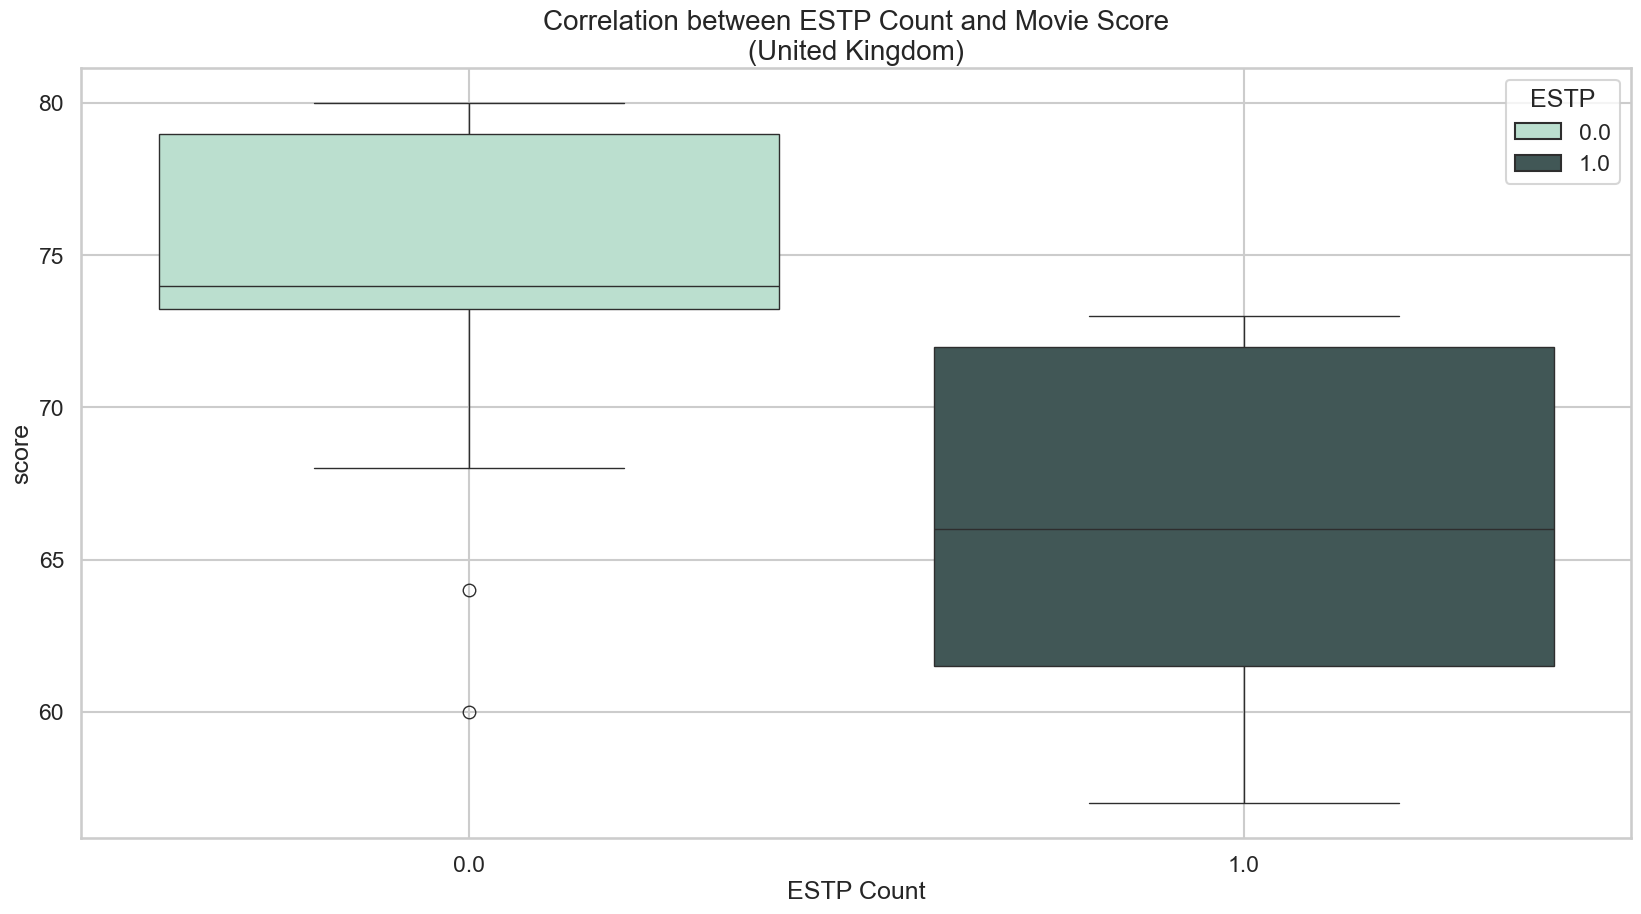

In [219]:
# Plot the boxplot of score in UK with and without ESTP
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df[filtered_df['country'] == 'United Kingdom'], x='ESTP', y='score', hue='ESTP', palette=["#B5E5CF", "#3D5B59"])
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom)', fontsize=20,)
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.savefig('images/Geographic/ESTP_Score_UK.png')  # Save the graph as an image file

plt.show()

In [220]:
# Filter out the movie genres that contain 'Romance' and do not have NaN values
filtered_df_romance = filtered_df[filtered_df['genre'].str.contains('Romance') & filtered_df['genre'].notna()]
filtered_df_romance.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
132,Life In A Year,2020-11-27,83.0,"Drama, Romance",90000000.0,6.278511e+08,United States of America,2020.0,North America,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.3125
216,The Little Mermaid,2023-05-26,0.0,"Adventure, Family, Fantasy, Romance",205000000.0,1.783599e+08,United States of America,2023.0,North America,0.0,...,2.0,0.0,2.0,1.0,0.0,3.0,2.0,2.0,3.0,1.4375
247,Fifty Shades Of Grey,2015-02-12,59.0,"Drama, Romance, Thriller",40000000.0,5.707950e+08,Australia,2015.0,Oceania,0.0,...,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.6875
309,Titanic,1997-12-18,79.0,"Drama, Romance",200000000.0,2.222986e+09,Australia,1997.0,Oceania,0.0,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.8125
330,Me Before You,2016-06-16,79.0,"Drama, Romance",20000000.0,2.080649e+08,Australia,2016.0,Oceania,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875


### Focus on Romance Genre in UK

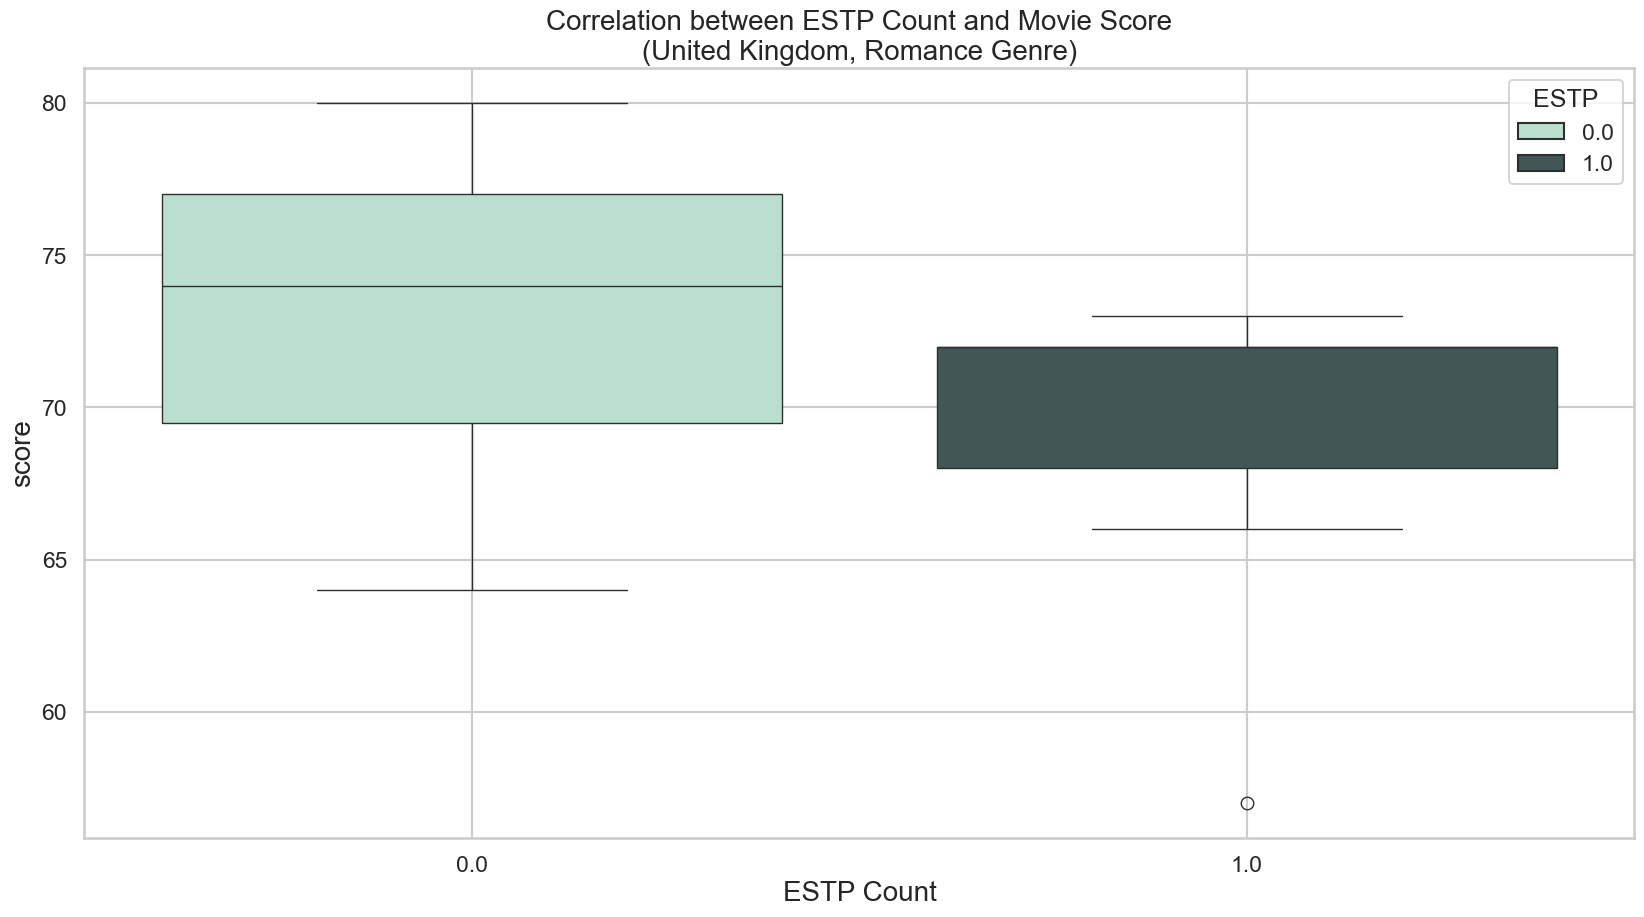

In [221]:
# Draw the boxplot of score in UK with and without ESTP
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df_romance[filtered_df_romance['country'] == 'United Kingdom'], x='ESTP', y='score', hue='ESTP', palette=["#B5E5CF", "#3D5B59"])
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Romance Genre)', fontsize=20)
plt.xlabel('ESTP Count', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.grid(True)
plt.savefig('images/Geographic/ESTP_Romance_UK.png')  # Save the graph as an image file
plt.show()


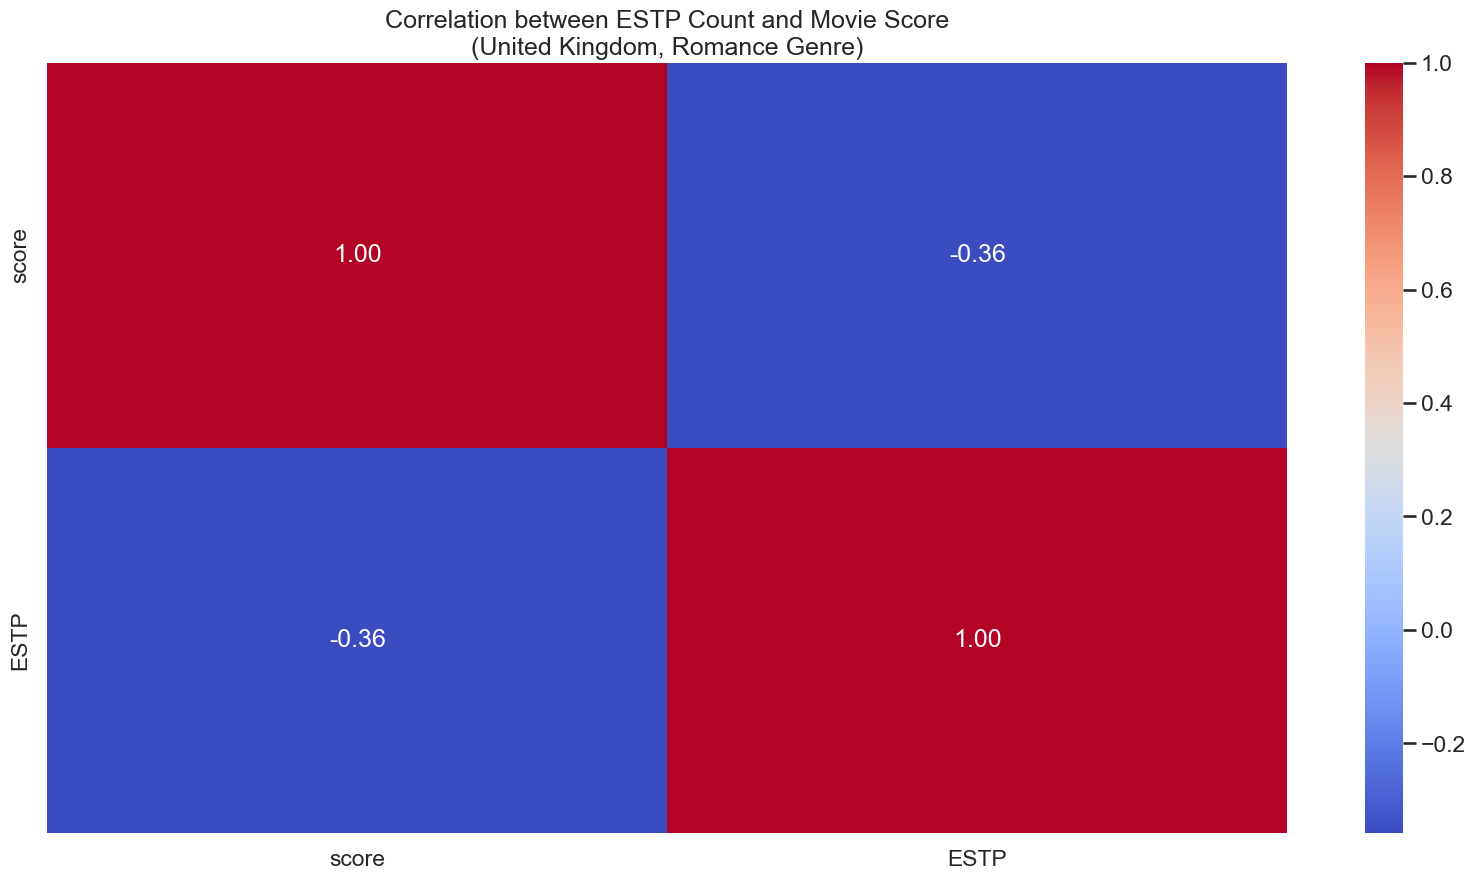

In [222]:
# Draw the correlation matrix of score and ESTP in UK
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df_romance[filtered_df_romance['country'] == 'United Kingdom'][['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Romance Genre)')
plt.savefig('images/Geographic/ESTP_Romance_UK_heatmap.png')  # Save the graph as an image file
plt.show()

### Zoom out to top3 landscape

/var/folders/br/n0gxlymn0t53y30rm6v_3swc0000gn/T/ipykernel_10551/440739828.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='ESTP', y='score', data=filtered_df_romance, palette=["#E63946", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557"])


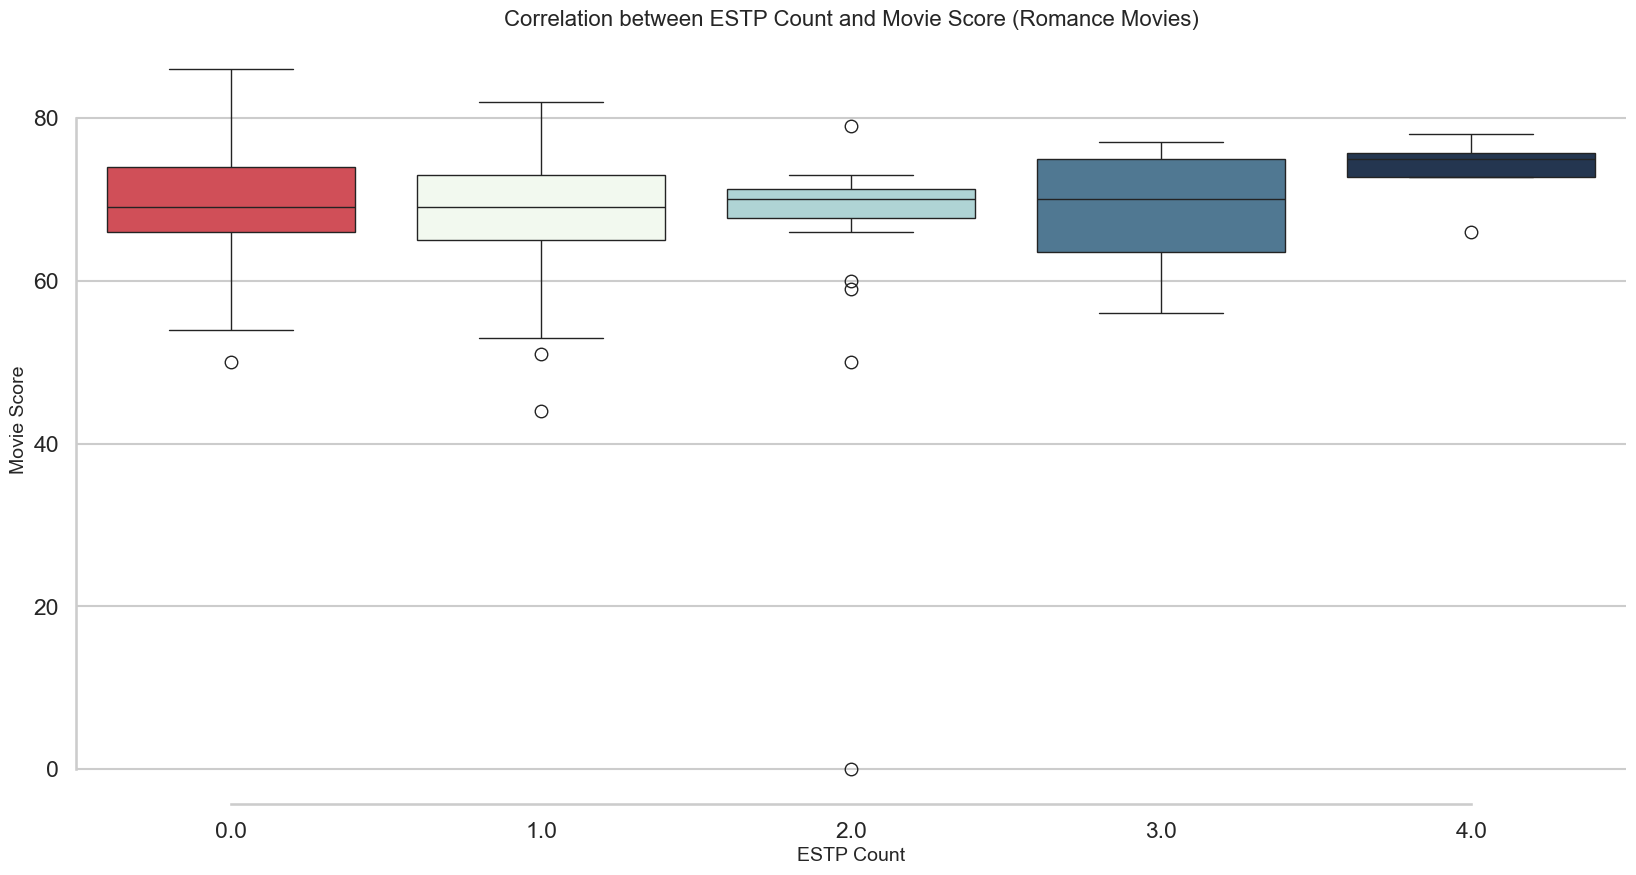

In [223]:
# # Plot the boxplot of score over the world with and without ESTP
# plt.figure(figsize=(10, 4))
# sns.boxplot(data=filtered_df_romance, x='ESTP', y='score')
# plt.title('Correlation between ESTP Count and Movie Score\n(Romance Movies)')
# plt.xlabel('ESTP Count')
# plt.ylabel('score')
# plt.grid(True)
# plt.show()


# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Set the context to "talk" for larger fonts and lines
sns.set_context('talk')

# Choose a nice color palette
sns.set_palette('pastel')

# Create the boxplot with Seaborn
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='ESTP', y='score', data=filtered_df_romance, palette=["#E63946", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557"])

# Despine the plot
sns.despine(trim=True)

# Set the labels and title
ax.set_xlabel('ESTP Count', fontsize=14)
ax.set_ylabel('Movie Score', fontsize=14)
ax.set_title('Correlation between ESTP Count and Movie Score (Romance Movies)', fontsize=16)
plt.savefig('images/Geographic/ESTP_Romance_Country.png')  # Save the graph as an image file

In [224]:
# Calculate the length of the movie in Europe but not in UK
filtered_df[filtered_df['continent'] == 'Europe']['country'].nunique()

1

In [225]:
# Filter out the movie genres that contain 'Thriller' and do not have NaN values
filtered_df_dramma = filtered_df[filtered_df['genre'].str.contains('Drama') & filtered_df['genre'].notna()]
filtered_df_dramma.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,continent,ENFJ,...,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,average_mbti
58,A Bronx Tale,1994-05-20,78.0,"Drama, Crime",10000000.0,17287898.0,Australia,1994.0,Oceania,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.375
109,The Ten Commandments,1958-12-12,78.0,"Drama, History",13500000.0,85433929.0,Australia,1958.0,Oceania,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.500
110,The Ten Commandments,1958-12-12,78.0,"Drama, History",10000000.0,1051907.0,Australia,1958.0,Oceania,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.500
115,Creed,2015-11-26,74.0,Drama,37000000.0,173567581.0,Australia,2015.0,Oceania,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.125
127,Hacksaw Ridge,2016-10-07,82.0,"Drama, History, War",40000000.0,169023926.0,Australia,2016.0,Oceania,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.375


### Focus on Drama

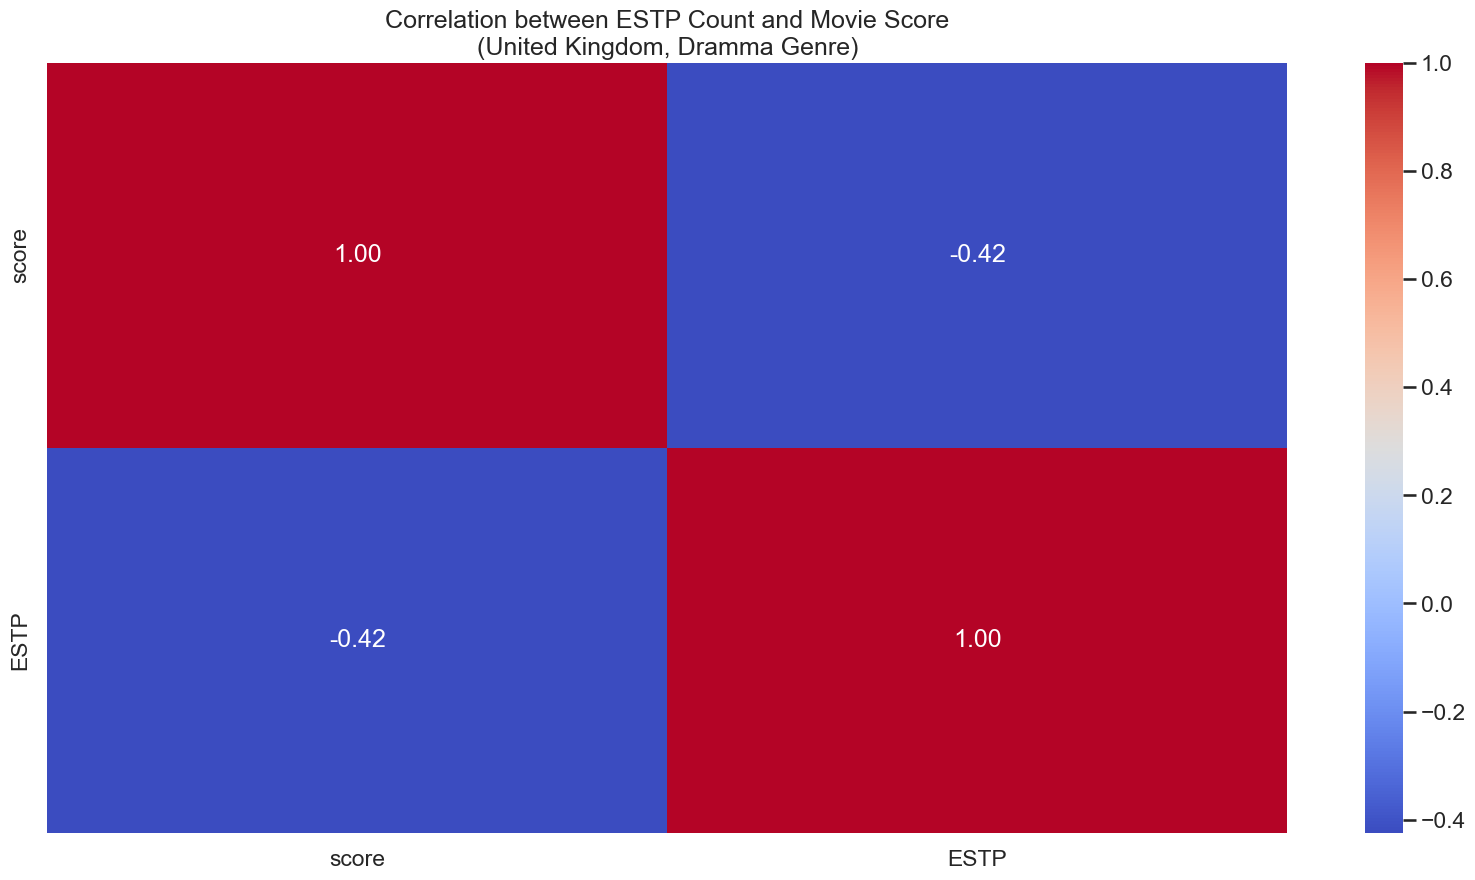

In [226]:
# Draw the correlation matrix of score and ESTP in UK
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df_dramma[filtered_df_dramma['country'] == 'United Kingdom'][['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Dramma Genre)')
plt.savefig('images/Geographic/ESTP_Drama_UK_heatmap.png')  # Save the graph as an image file
plt.show()

### Zoom out to global landscape

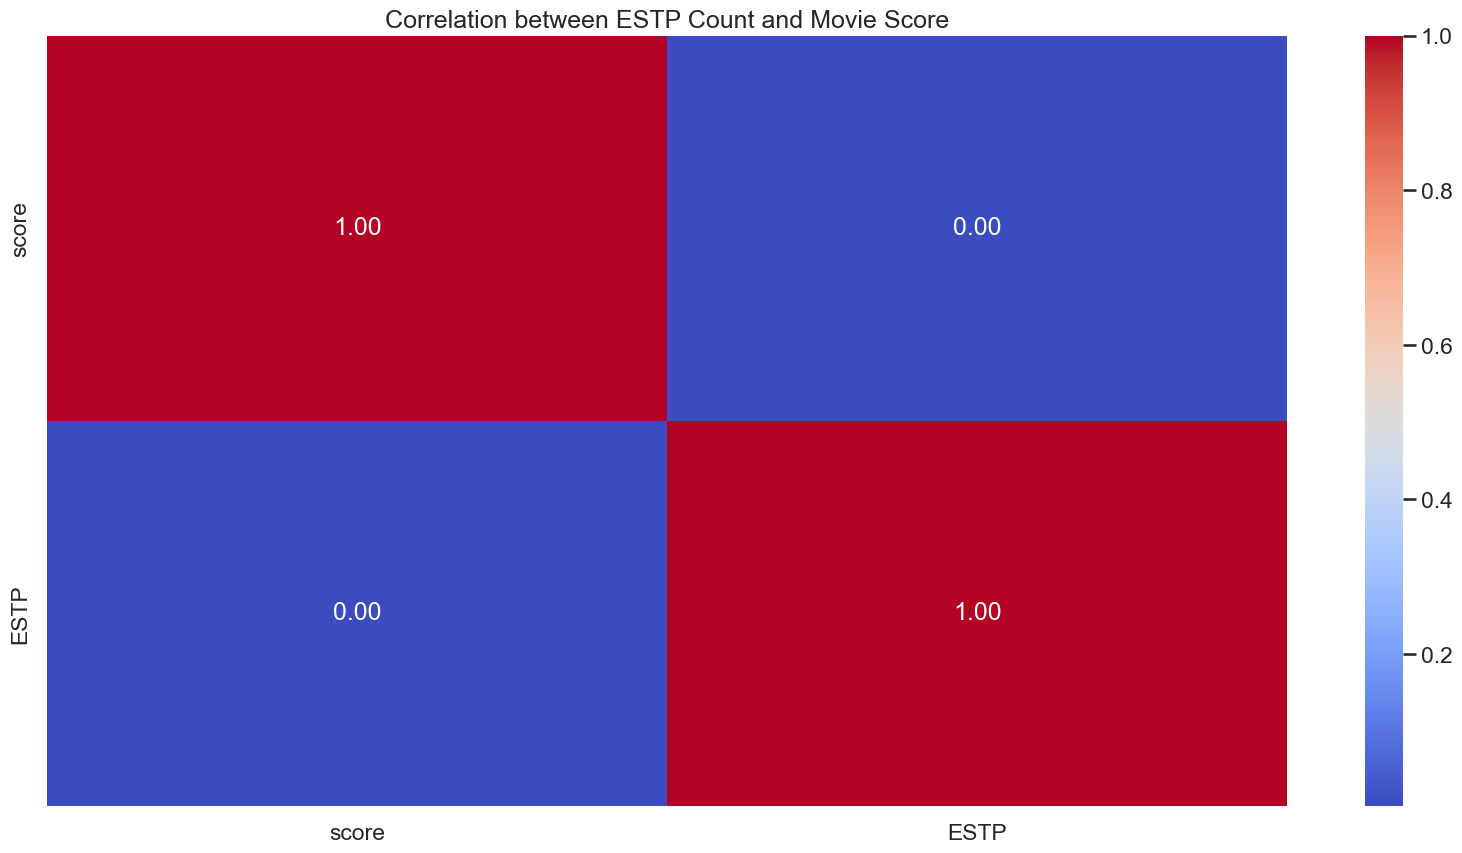

In [227]:
# Plot the correlation matrix of score and ESTP over the world
plt.figure(figsize=(20, 10))
sns.heatmap(df_imdb_mbti[['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score')
plt.show()